In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer
from datetime import datetime
from sklearn.feature_extraction.text import Tfidf_trainVectorizer
from sklearn.model_selection import train_test_split
from time import time
import seaborn as sns
from tqdm import tqdm

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df_train = pd.read_csv("loaded_train.csv")
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,"Unlike Next, which we'd eaten at the previous ...",N,Scott E.,"Glengary, WV",...,11,48,5,41,5,5,2,0,1,4.5
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,Probably one of the best meals I've had ever. ...,N,Jerry K.,"Palos Verdes Peninsula, CA",...,0,4,0,0,0,0,0,0,0,4.5
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,Service was impeccable. Experience and present...,N,Patricia M.,"Chicago, IL",...,2,11,0,6,0,1,0,0,0,4.5
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,"The problem with places like this, given the e...",N,Terry N.,"San Jose, CA",...,84,60,1,35,8,6,6,11,0,4.5
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,I have no idea how to write my review - dining...,N,Shradha Vegetarianista A.,"Chicago, IL",...,333,1209,61,1650,679,417,283,22,70,4.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,"It's Taco Bell, with higher prices, but it's T...",N,Kristen F.,"Chicago, IL",...,31,165,33,201,56,17,24,0,3,4.0
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,Yellow Rose is a favorite of mine. I'd go ther...,N,Yvonne F.,IL,...,6,11,2,7,2,0,1,0,1,4.0
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,Not bad. We ate there because the odd wicker s...,N,Saverio T.,"Chicago, IL",...,13,49,7,58,9,10,7,1,1,4.0
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,We were surprised to have been eagerly roped i...,N,Saverio T.,"Chicago, IL",...,13,49,7,58,9,10,7,1,1,4.0


In [ ]:
df_train.shape

(26958, 21)

In [ ]:
df_train.columns

Index(['reviewID', 'reviewerID', 'restaurantID', 'date', 'rating',
       'reviewUsefulCount', 'reviewContent', 'flagged', 'name', 'location',
       'yelpJoinDate', 'friendCount', 'reviewCount', 'firstCount',
       'usefulCount', 'coolCount', 'funnyCount', 'complimentCount', 'tipCount',
       'fanCount', 'restaurantRating'],
      dtype='object')

In [ ]:
df_train.dtypes

reviewID              object
reviewerID            object
restaurantID          object
date                  object
rating                 int64
reviewUsefulCount      int64
reviewContent         object
flagged               object
name                  object
location              object
yelpJoinDate          object
friendCount            int64
reviewCount            int64
firstCount             int64
usefulCount            int64
coolCount              int64
funnyCount             int64
complimentCount        int64
tipCount               int64
fanCount               int64
restaurantRating     float64
dtype: object

In [ ]:
print("Cleaning Data")

# Removing \n from date field
for i in range(len(df_train['date'])):
    if df_train['date'][i][0] == '\n':
        df_train['date'][i] = df_train['date'][i][1:]

# Pre-processing Text Reviews
stop = stopwords.words('english')

df_train['reviewContent'] = df_train['reviewContent'].apply(
        lambda x: ' '.join(word for word in str(x).split() if word not in stop))

tokenizer = RegexpTokenizer(r'\w+')
df_train['reviewContent'] = df_train['reviewContent'].apply(
        lambda x: ' '.join(word for word in tokenizer.tokenize(x)))

df_train['reviewContent'] = df_train['reviewContent'].apply(
        lambda x: x.lower())

df_train['date'] = pd.to_datetime(df_train['date'], format='m/%d/%Y', errors='ignore')

df_train['yelpJoinDate'] = pd.to_datetime(df_train['yelpJoinDate'], format='m/%d/%Y', errors='ignore')

print("Data Cleaning Complete")

Cleaning Data
Data Cleaning Complete


In [ ]:
df_train.dtypes

reviewID              object
reviewerID            object
restaurantID          object
date                  object
rating                 int64
reviewUsefulCount      int64
reviewContent         object
flagged               object
name                  object
location              object
yelpJoinDate          object
friendCount            int64
reviewCount            int64
firstCount             int64
usefulCount            int64
coolCount              int64
funnyCount             int64
complimentCount        int64
tipCount               int64
fanCount               int64
restaurantRating     float64
dtype: object

In [ ]:
#Analysis of Target Label

In [ ]:
df_train['flagged'] = (df_train['flagged'] =='Y').astype(int)

In [ ]:
df_train['flagged'].value_counts()

0    20752
1     6206
Name: flagged, dtype: int64

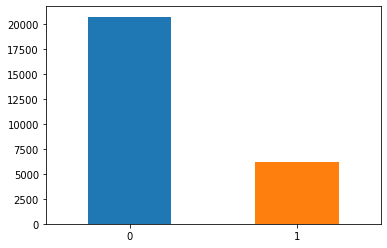

In [ ]:
df_train['flagged'].value_counts().plot(kind='bar',rot=0, color=['C0', 'C1'])

In [ ]:
#As we can see the data is highly imbalanced. 

In [ ]:
#Calculate Length of Review ( no of words) and create a new feature
df_train['ReviewLength'] = df_train.apply(lambda row: len(row['reviewContent'].split(' ')), axis = 1)

In [ ]:
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,0,Scott E.,"Glengary, WV",...,48,5,41,5,5,2,0,1,4.5,497
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,0,Jerry K.,"Palos Verdes Peninsula, CA",...,4,0,0,0,0,0,0,0,4.5,41
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,0,Patricia M.,"Chicago, IL",...,11,0,6,0,1,0,0,0,4.5,27
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,0,Terry N.,"San Jose, CA",...,60,1,35,8,6,6,11,0,4.5,244
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,0,Shradha Vegetarianista A.,"Chicago, IL",...,1209,61,1650,679,417,283,22,70,4.5,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,it s taco bell higher prices taco bell what st...,0,Kristen F.,"Chicago, IL",...,165,33,201,56,17,24,0,3,4.0,48
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,yellow rose favorite mine i d go every day i c...,0,Yvonne F.,IL,...,11,2,7,2,0,1,0,1,4.0,63
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,not bad we ate odd wicker seats inviting we at...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,27
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,we surprised eagerly roped pop trivia game upo...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,42


In [ ]:
#Analysis of Review Length

In [ ]:
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,0,Scott E.,"Glengary, WV",...,48,5,41,5,5,2,0,1,4.5,497
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,0,Jerry K.,"Palos Verdes Peninsula, CA",...,4,0,0,0,0,0,0,0,4.5,41
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,0,Patricia M.,"Chicago, IL",...,11,0,6,0,1,0,0,0,4.5,27
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,0,Terry N.,"San Jose, CA",...,60,1,35,8,6,6,11,0,4.5,244
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,0,Shradha Vegetarianista A.,"Chicago, IL",...,1209,61,1650,679,417,283,22,70,4.5,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,it s taco bell higher prices taco bell what st...,0,Kristen F.,"Chicago, IL",...,165,33,201,56,17,24,0,3,4.0,48
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,yellow rose favorite mine i d go every day i c...,0,Yvonne F.,IL,...,11,2,7,2,0,1,0,1,4.0,63
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,not bad we ate odd wicker seats inviting we at...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,27
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,we surprised eagerly roped pop trivia game upo...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,42


In [ ]:
df_train.ReviewLength

0        497
1         41
2         27
3        244
4         97
        ... 
26953     48
26954     63
26955     27
26956     42
26957     20
Name: ReviewLength, Length: 26958, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


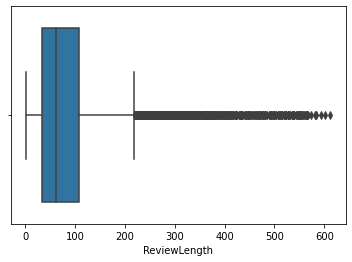

In [ ]:
sns.boxplot(df_train.ReviewLength)

In [ ]:
df_train['ReviewLength'].describe()

count    26958.000000
mean        81.443801
std         71.818906
min          1.000000
25%         33.000000
50%         61.000000
75%        107.000000
max        612.000000
Name: ReviewLength, dtype: float64

In [ ]:
def review_length_rating (row):
   if row['ReviewLength'] >= 61 :
      return 'Long Review'
   else:
      return 'Short Review'   

In [ ]:
df_train.apply (lambda row: review_length_rating(row), axis=1)

0         Long Review
1        Short Review
2        Short Review
3         Long Review
4         Long Review
             ...     
26953    Short Review
26954     Long Review
26955    Short Review
26956    Short Review
26957    Short Review
Length: 26958, dtype: object

In [ ]:
df_train['review_length_label'] = df_train.apply (lambda row: review_length_rating(row), axis=1)
df_train.sample(n=10)

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,review_length_label
13624,5-ELFWG8zVrlyC0HM8Vyyg,JTjbWsSYHvaTsgALd9_P8g,OKOfoisduqP24uK3WYvx7Q,9/17/2012,4,0,the best thing place beer food good kind overp...,0,Derek M.,"Chicago, IL",...,0,14,2,0,0,0,0,4.0,9,Short Review
15373,nTrrJeC1hULZ-vGqYJ8jiA,pr_uiBKzyuuk6iuLNJP-Mg,oCTlReyKjJxKPFYfCurxxQ,5/12/2010,2,1,i hated joint first smell to honest i thought ...,0,Dave davem60612 M.,"Chicago, IL",...,2,12,3,11,0,0,0,4.0,164,Long Review
5609,WpU1jxu6LlPQtz0ouCc91Q,D81SDP3g2zSiFIkRoCxORQ,hylBw5ND7XyPldM6BN28vw,2/13/2012,3,0,i give place 3 5 i went saturday valentines da...,0,Kathryn W.,"Chicago, IL",...,2,126,14,41,13,0,1,4.0,120,Long Review
13957,zjtRtR,8q3-8iM9WRTk3VDxLmFIHw,OKOfoisduqP24uK3WYvx7Q,9/17/2011,4,0,i ve twice far the first time average impressi...,0,Adam The Atom Bomb M.,"Chicago, IL",...,0,6,3,1,1,0,0,4.0,65,Long Review
14811,nqlbIdSPbpIdVmA7z9j8gQ,Mnfs6Y88rkrkqi1ESedNzQ,LlHEzxQTiiLJokn2tli35A,7/29/2009,4,0,mmm popcorn i took boyfriend ge birthday dinne...,1,Caitlan W.,"Chicago, IL",...,0,0,0,0,0,0,0,4.0,179,Long Review
6406,JiQVteSRHaVh3xGRGHtGEw,9nPacPzU4aMnvPRsCdol8w,o54U2VkQama8FI30qDkWvw,5/31/2011,5,1,all i say i pretty much cried i left chicago i...,0,Erica J.,"Chicago, IL",...,0,15,1,1,1,1,1,4.0,86,Long Review
9784,yPFNGF9kagddtktgdg2kPg,LUJyL8-J_IJOcErPvJ1K0Q,qqax04alS3UPx0Yp4jJNDQ,3/19/2009,5,0,the best brunch place city hands down the huev...,0,Lindsay S.,"Chicago, IL",...,0,0,0,1,1,0,0,3.5,64,Long Review
11363,FbH-9YPi7oG4oOwNDvAhPw,RY-bp_DuuR_FZL6_xXj9Tg,d6UbRb9W5eA1yL-DuVZ8ug,4/25/2012,3,0,went brunch service amazing 5 stars service 3 ...,0,Cat H.,"Manhattan, NY",...,0,2,0,0,0,0,0,4.0,47,Short Review
2473,dgXx71ebVCpBYQep-wY1DA,x9IgmPVsWWLVH5hm_s5l6g,oLM9piDKbj2PDgy-m3XEcQ,9/20/2010,5,3,calo ristorante one best chicago lovely restau...,0,Lorelei Passed my Finals with a B! C.,"Chicago, IL",...,9,152,116,96,63,0,4,4.0,106,Long Review
26382,vvstAAitefNs2FvJ43AgPg,jC7g4DIfWWFcgnS-Vwckfg,Rlg07N7Sl1qTzjc7zc6Whg,3/26/2010,1,0,i support establishment treats staff poorly i ...,1,Camille S.,"Chicago, IL",...,0,1,0,0,0,0,0,4.0,57,Short Review


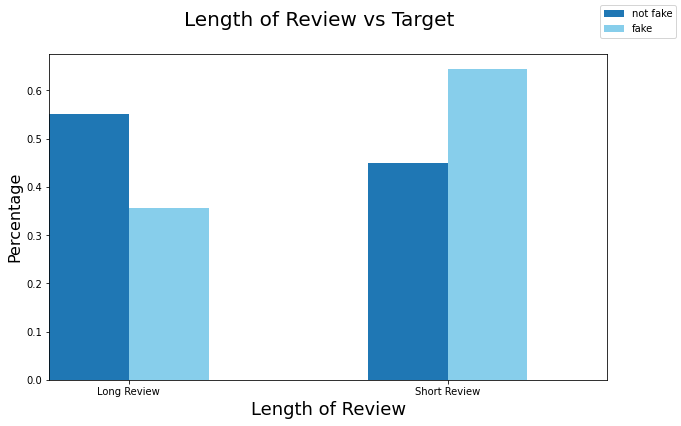

In [ ]:
# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Length of Review vs Target', fontsize=20)
plt.xlabel('Length of Review', fontsize=18)
plt.ylabel('Percentage', fontsize=16)

target_0_df_train['review_length_label'].value_counts(normalize=True).sort_index().plot(kind='bar', position=1, width = width) #sort index is necessary
target_1_df_train['review_length_label'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue', position=0, width = width)  #sort index is necessary

fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
#genuine
target_0_df_train['review_length_label'].value_counts(normalize=True).sort_index()

Long Review     0.550212
Short Review    0.449788
Name: review_length_label, dtype: float64

In [ ]:
#fake
target_1_df_train['review_length_label'].value_counts(normalize=True).sort_index()

Long Review     0.355785
Short Review    0.644215
Name: review_length_label, dtype: float64

In [ ]:
#Analysis of Repeated Reviewers

In [ ]:
df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False)

,reviewerID,count
12398,jrMxBHW3SlUGVGYWvPsHWA,57
13732,om5ZiponkpRqUNa3pVPiRg,47
9505,ZYZNcugF3xUEGyLOVGiZ0Q,40
5887,LZwRtRSIR7Jv6LdBfqQyfA,39
5809,LJ8U5ZVnFpF8XNUR7DcUng,38
...,...,...
6381,NTH29hvm2Ud95k4wfDiKhw,1
6382,NTVEqZ1Nnvt2jByIFSPRpg,1
6384,NTxkDEPt8haCbtn99zdmAQ,1
16676,zz1xkuwGqxdpH-JJZUYp4g,1


In [ ]:
df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False).iloc[:45]

,reviewerID,count
12398,jrMxBHW3SlUGVGYWvPsHWA,57
13732,om5ZiponkpRqUNa3pVPiRg,47
9505,ZYZNcugF3xUEGyLOVGiZ0Q,40
5887,LZwRtRSIR7Jv6LdBfqQyfA,39
5809,LJ8U5ZVnFpF8XNUR7DcUng,38
12586,kW2dk1CWihmh3g7k9N2G8A,35
14734,sZxXpvmBUN2fSCtK_BZFoQ,33
14440,rQrqrb5dFztAeFYwyqbygA,32
229,-q0rmCOPCgakJJ0H2mJ1mg,32
6778,OzdqM7BbvL27AnrTZ27g-w,32


In [ ]:
df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False).iloc[:45].reviewerID.tolist()

['jrMxBHW3SlUGVGYWvPsHWA',
 'om5ZiponkpRqUNa3pVPiRg',
 'ZYZNcugF3xUEGyLOVGiZ0Q',
 'LZwRtRSIR7Jv6LdBfqQyfA',
 'LJ8U5ZVnFpF8XNUR7DcUng',
 'kW2dk1CWihmh3g7k9N2G8A',
 'sZxXpvmBUN2fSCtK_BZFoQ',
 'rQrqrb5dFztAeFYwyqbygA',
 '-q0rmCOPCgakJJ0H2mJ1mg',
 'OzdqM7BbvL27AnrTZ27g-w',
 'a4seSZMF9QxPBGAJ9MjaPw',
 '4DyMRBKrokax6d8LCI3GAw',
 '4mjnkd8oJVCfBKN3i4rB-g',
 '4rsklgVwg7uOdaRfpHT2Vg',
 'zTAdyMYSvwesdzAlz3haUw',
 'ETpvceVRtVLjhDEgugFieg',
 'L4CXCKMj2NDsr8fd2_XmkA',
 'IL4O2SIcumu1un5UkgB3FQ',
 'VdTeE7P9AP-fj3ExmRhoEg',
 '5T5At0Q1cXCPV66Cq23oEQ',
 'SDURW9xVesI7-Yl9naeEog',
 'tToOHav143V1NXH0nf_YIA',
 'z7PyvXCkkT6uz2zoo3Hv2A',
 'zRqLUhisGUmXmyDGS4aaqA',
 'zH3dt6CdiHIvmfsDHcqTpA',
 'OGV40r9v4MZ7r2gwkutNbw',
 'U4INQZOPSUaj8hMjLlZ3KA',
 'eTZhMslm9hfeXS-Rq8uGiA',
 '2YuYRqSTsqHHZaiWXpo3Aw',
 'C0RkWAPYK58ms-BLBrFCVA',
 'nOs7s96Vmz9Emn7IIsLTeg',
 'gr7u6VJs69WNj7b4QoPlCg',
 '2TPODjHaHQ-cThz-oahpXQ',
 '42nIPBmLeJPNYDhldNnqTQ',
 'nlny5kyBZVn7450qCaHlVA',
 '7hOm61H0NuqkDH0zG8PoJA',
 'vzoB7-jmn63BwnnIxL7yWw',
 

In [ ]:
for i in df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False).iloc[:45].reviewerID.tolist():
  print(i)
  print(df_train[df_train['reviewerID']==i]['flagged'].value_counts())

jrMxBHW3SlUGVGYWvPsHWA
0    57
Name: flagged, dtype: int64
om5ZiponkpRqUNa3pVPiRg
0    47
Name: flagged, dtype: int64
ZYZNcugF3xUEGyLOVGiZ0Q
0    40
Name: flagged, dtype: int64
LZwRtRSIR7Jv6LdBfqQyfA
0    39
Name: flagged, dtype: int64
LJ8U5ZVnFpF8XNUR7DcUng
0    38
Name: flagged, dtype: int64
kW2dk1CWihmh3g7k9N2G8A
0    35
Name: flagged, dtype: int64
sZxXpvmBUN2fSCtK_BZFoQ
0    33
Name: flagged, dtype: int64
rQrqrb5dFztAeFYwyqbygA
0    32
Name: flagged, dtype: int64
-q0rmCOPCgakJJ0H2mJ1mg
0    32
Name: flagged, dtype: int64
OzdqM7BbvL27AnrTZ27g-w
0    32
Name: flagged, dtype: int64
a4seSZMF9QxPBGAJ9MjaPw
0    32
Name: flagged, dtype: int64
4DyMRBKrokax6d8LCI3GAw
0    30
Name: flagged, dtype: int64
4mjnkd8oJVCfBKN3i4rB-g
0    29
Name: flagged, dtype: int64
4rsklgVwg7uOdaRfpHT2Vg
0    26
Name: flagged, dtype: int64
zTAdyMYSvwesdzAlz3haUw
0    24
Name: flagged, dtype: int64
ETpvceVRtVLjhDEgugFieg
0    23
Name: flagged, dtype: int64
L4CXCKMj2NDsr8fd2_XmkA
0    23
Name: flagged, dtype: int

In [ ]:
#Repeated reviewers are always genuine!!!

In [ ]:
#TO DO: Try with theshold as 3/4/5 and report accuracy for each threshold


In [ ]:
df_train.shape

(26958, 23)

In [ ]:
repeated_reviewers = df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False)

#repeated_reviewers = repeated_reviewers[(repeated_reviewers['count']>=2) & (repeated_reviewers['count']<=5)] #specify threshold here
repeated_reviewers = repeated_reviewers[(repeated_reviewers['count']>=1)] #specify threshold here

repeated_reviewers

,reviewerID,count
12398,jrMxBHW3SlUGVGYWvPsHWA,57
13732,om5ZiponkpRqUNa3pVPiRg,47
9505,ZYZNcugF3xUEGyLOVGiZ0Q,40
5887,LZwRtRSIR7Jv6LdBfqQyfA,39
5809,LJ8U5ZVnFpF8XNUR7DcUng,38
...,...,...
6379,NT6gnnfZFD4kui1dwDPpsQ,1
6381,NTH29hvm2Ud95k4wfDiKhw,1
6382,NTVEqZ1Nnvt2jByIFSPRpg,1
6384,NTxkDEPt8haCbtn99zdmAQ,1


In [ ]:
count_of_fake_reviews = 0
count_of_genuine_reviews = 0

for i in repeated_reviewers.reviewerID:

  #print(i)
  #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts())
  #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts().index[0])
  #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[0])

  #len(df_train[df_train['reviewerID']==i]['flagged'].value_counts())
  #print(len(df_train[df_train['reviewerID']==i]['flagged'].value_counts()))

  if len(df_train[df_train['reviewerID']==i]['flagged'].value_counts()) ==1:

    if df_train[df_train['reviewerID']==i]['flagged'].value_counts().index[0] == 0:
      count_of_genuine_reviews = count_of_genuine_reviews + df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[0]
  
    if df_train[df_train['reviewerID']==i]['flagged'].value_counts().index[0] == 1:
      count_of_fake_reviews = count_of_fake_reviews + df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[0]
  
  else:
     #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts())
     #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts().index[0])
     
     if(df_train[df_train['reviewerID']==i]['flagged'].value_counts().index[0])==1:
       #print("!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!")
       #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist())
       
       count_of_fake_reviews = count_of_fake_reviews + df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[0]
       count_of_genuine_reviews = count_of_genuine_reviews + df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[1]


     if(df_train[df_train['reviewerID']==i]['flagged'].value_counts().index[0])==0:
        #print(df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist())
       
        count_of_fake_reviews = count_of_fake_reviews + df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[1]
        count_of_genuine_reviews = count_of_genuine_reviews + df_train[df_train['reviewerID']==i]['flagged'].value_counts().tolist()[0]
        
     #print()

     
     #print()
     #break

In [ ]:
#count_of_fake_reviews

In [ ]:
#count_of_genuine_reviews

In [ ]:
count_of_total_reviews = count_of_genuine_reviews + count_of_fake_reviews
#count_of_total_reviews

In [ ]:
print("Percentage of Genuine Reviews:",count_of_genuine_reviews*100/count_of_total_reviews )
print("Percentage of Fake Reviews:",count_of_fake_reviews*100/count_of_total_reviews )

Percentage of Genuine Reviews: 76.97815038765441
Percentage of Fake Reviews: 23.021849612345587


1. Repeated Reviewers with reviews >=5


*   Genuine Review Percentage: 99.37%
*   Fake Review Percentage: 0.63%



2. Repeated Reviewers with reviews >=4 

*   Genuine Review Percentage: 98.82%
*   Fake Review Percentage: 1.18%


3. Repeated Reviewers with reviews >=3 

*   Genuine Review Percentage: 97.04%
*   Fake Review Percentage: 2.96%


4. Repeated Reviewers with reviews >=2 

*   Genuine Review Percentage: 92.12%
*   Fake Review Percentage: 7.88%


5. Repeated Reviewers with reviews >=1 

*   Genuine Review Percentage: 76.97%
*   Fake Review Percentage: 23.03%




In [ ]:
# initialize list of lists
data = [['reviews>=5',99.37, 0.63], ['reviews>=4',98.82, 1.18],['reviews>=3',97.04, 2.96],['reviews>=2',92.12, 7.88]]
  
# Create the pandas DataFrame
results_repeated_reviews = pd.DataFrame(data, columns=['Threshold', 'Genuine Percentage', 'Fake Percentage'])
  
# print dataframe.
results_repeated_reviews

,Threshold,Genuine Percentage,Fake Percentage
0,reviews>=5,99.37,0.63
1,reviews>=4,98.82,1.18
2,reviews>=3,97.04,2.96
3,reviews>=2,92.12,7.88


In [ ]:
results_repeated_reviews.to_csv("repeated-reviewers.csv", index=None)

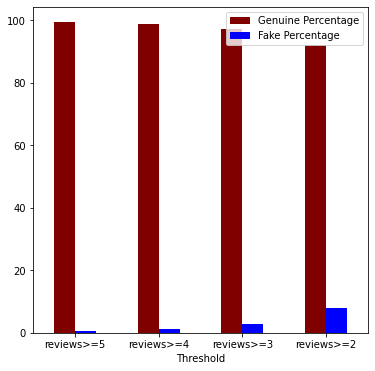

In [ ]:
# plotting graph
results_repeated_reviews.plot(x="Threshold", y=["Genuine Percentage", "Fake Percentage"], kind="bar",rot=0, figsize=(6,6), color=["maroon","blue"])

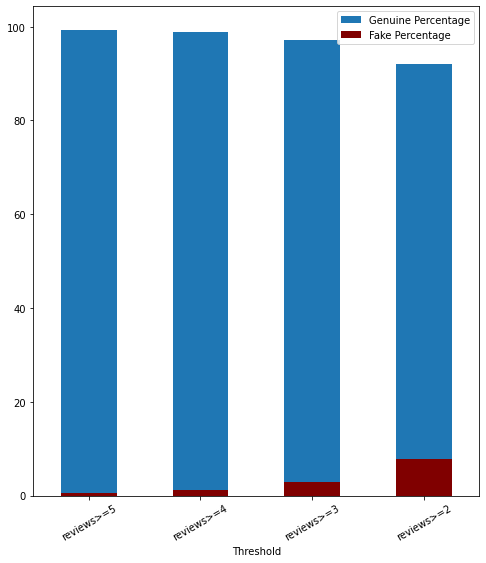

In [ ]:
# plotting Height
ax = results_repeated_reviews.plot(x="Threshold", y=["Genuine Percentage"], kind="bar")
# plotting age on the same axis
results_repeated_reviews.plot(x="Threshold", y="Fake Percentage", kind="bar", ax=ax, color="maroon",rot=30,figsize=(8,9))

In [ ]:
repeated_reviewers = df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False)

repeated_reviewers = repeated_reviewers[(repeated_reviewers['count']>=4)] #specify threshold here

repeated_reviewers

,reviewerID,count
12398,jrMxBHW3SlUGVGYWvPsHWA,57
13732,om5ZiponkpRqUNa3pVPiRg,47
9505,ZYZNcugF3xUEGyLOVGiZ0Q,40
5887,LZwRtRSIR7Jv6LdBfqQyfA,39
5809,LJ8U5ZVnFpF8XNUR7DcUng,38
...,...,...
16616,zhlkZIPZ4yqAYDvftPXu4g,4
14525,rjdkZMybLtJfoAGW7RZ0mw,4
5054,IUTgCDuiIh0jctyRm_oPzg,4
6924,P_pk7ld02y4Cf7S-DOwIzw,4


In [ ]:
list_of_repeated_reviewers = repeated_reviewers.reviewerID.tolist()
list_of_repeated_reviewers

['jrMxBHW3SlUGVGYWvPsHWA',
 'om5ZiponkpRqUNa3pVPiRg',
 'ZYZNcugF3xUEGyLOVGiZ0Q',
 'LZwRtRSIR7Jv6LdBfqQyfA',
 'LJ8U5ZVnFpF8XNUR7DcUng',
 'kW2dk1CWihmh3g7k9N2G8A',
 'sZxXpvmBUN2fSCtK_BZFoQ',
 'rQrqrb5dFztAeFYwyqbygA',
 '-q0rmCOPCgakJJ0H2mJ1mg',
 'OzdqM7BbvL27AnrTZ27g-w',
 'a4seSZMF9QxPBGAJ9MjaPw',
 '4DyMRBKrokax6d8LCI3GAw',
 '4mjnkd8oJVCfBKN3i4rB-g',
 '4rsklgVwg7uOdaRfpHT2Vg',
 'zTAdyMYSvwesdzAlz3haUw',
 'ETpvceVRtVLjhDEgugFieg',
 'L4CXCKMj2NDsr8fd2_XmkA',
 'IL4O2SIcumu1un5UkgB3FQ',
 'VdTeE7P9AP-fj3ExmRhoEg',
 '5T5At0Q1cXCPV66Cq23oEQ',
 'SDURW9xVesI7-Yl9naeEog',
 'tToOHav143V1NXH0nf_YIA',
 'z7PyvXCkkT6uz2zoo3Hv2A',
 'zRqLUhisGUmXmyDGS4aaqA',
 'zH3dt6CdiHIvmfsDHcqTpA',
 'OGV40r9v4MZ7r2gwkutNbw',
 'U4INQZOPSUaj8hMjLlZ3KA',
 'eTZhMslm9hfeXS-Rq8uGiA',
 '2YuYRqSTsqHHZaiWXpo3Aw',
 'C0RkWAPYK58ms-BLBrFCVA',
 'nOs7s96Vmz9Emn7IIsLTeg',
 'gr7u6VJs69WNj7b4QoPlCg',
 '2TPODjHaHQ-cThz-oahpXQ',
 '42nIPBmLeJPNYDhldNnqTQ',
 'nlny5kyBZVn7450qCaHlVA',
 '7hOm61H0NuqkDH0zG8PoJA',
 'vzoB7-jmn63BwnnIxL7yWw',
 

In [ ]:
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,0,Scott E.,"Glengary, WV",...,48,5,41,5,5,2,0,1,4.5,497
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,0,Jerry K.,"Palos Verdes Peninsula, CA",...,4,0,0,0,0,0,0,0,4.5,41
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,0,Patricia M.,"Chicago, IL",...,11,0,6,0,1,0,0,0,4.5,27
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,0,Terry N.,"San Jose, CA",...,60,1,35,8,6,6,11,0,4.5,244
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,0,Shradha Vegetarianista A.,"Chicago, IL",...,1209,61,1650,679,417,283,22,70,4.5,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,it s taco bell higher prices taco bell what st...,0,Kristen F.,"Chicago, IL",...,165,33,201,56,17,24,0,3,4.0,48
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,yellow rose favorite mine i d go every day i c...,0,Yvonne F.,IL,...,11,2,7,2,0,1,0,1,4.0,63
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,not bad we ate odd wicker seats inviting we at...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,27
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,we surprised eagerly roped pop trivia game upo...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,42


In [ ]:
#Analysis of Repeated Reviewers but for same restaurant

In [ ]:
df_train.shape

((26958, 22), (26958,))

In [ ]:
df_train.restaurantID.nunique()

121

In [ ]:
df_train.reviewerID.nunique()

16677

In [ ]:
df_train.reviewID.nunique()

26957

In [ ]:
df_train.groupby(["reviewerID","restaurantID"]).agg({'reviewID': ['count']})

reviewID
                                                 count
reviewerID             restaurantID                   
--1-HgcfL1vWbG-1hgn1oA 43rd1LKcZRIunySzbMsyLQ        1
--AGQM8GPHljgKdnLisXgQ JDNZxz0ud7zhuPo5pqznMA        1
--KQJPdrU0Md97DiOliDzw pbEiXam9YJL3neCYHGwLUA        1
--KXo_HCYq9hB8NOdEUMKw 1QKqtC4vML3QhkrSzwR_tQ        1
--Qh8yKWAvIP4V4K8ZPfHA 4wreIFjaPMppyEnzKHbozg        1
...                                                ...
zyIvm84qHPkXzdQWMwZGwg RYw_no9ohtCg09aKorVffg        1
                       sfWMOqUEp8S2adDeJp7Kzg        1
zyWj2xkEWmH4TH_OeZC5Nw 43rd1LKcZRIunySzbMsyLQ        1
                       8d_DiHWB-pjBVW3a7D8EWg        1
zz1xkuwGqxdpH-JJZUYp4g ms5ge1XY9-Alu7HkybAMdQ        1

[26958 rows x 1 columns]

In [ ]:
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,0,Scott E.,"Glengary, WV",...,48,5,41,5,5,2,0,1,4.5,497
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,0,Jerry K.,"Palos Verdes Peninsula, CA",...,4,0,0,0,0,0,0,0,4.5,41
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,0,Patricia M.,"Chicago, IL",...,11,0,6,0,1,0,0,0,4.5,27
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,0,Terry N.,"San Jose, CA",...,60,1,35,8,6,6,11,0,4.5,244
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,0,Shradha Vegetarianista A.,"Chicago, IL",...,1209,61,1650,679,417,283,22,70,4.5,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,it s taco bell higher prices taco bell what st...,0,Kristen F.,"Chicago, IL",...,165,33,201,56,17,24,0,3,4.0,48
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,yellow rose favorite mine i d go every day i c...,0,Yvonne F.,IL,...,11,2,7,2,0,1,0,1,4.0,63
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,not bad we ate odd wicker seats inviting we at...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,27
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,we surprised eagerly roped pop trivia game upo...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,42


In [ ]:
df_train.loc[len(df_train.index)] = ["x8knvE6V8MkwT90wCV0f5555",	"zyWj2xkEWmH4TH_OeZC5Nw",	"8d_DiHWB-pjBVW3a7D8EWg", np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,
                         np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5.0,0.0,unlike next we d eaten previous night dish com...,0.0,Scott E.,"Glengary, WV",...,48.0,5.0,41.0,5.0,5.0,2.0,0.0,1.0,4.5,497.0
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5.0,0.0,probably one best meals i ve ever it s perform...,0.0,Jerry K.,"Palos Verdes Peninsula, CA",...,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.5,41.0
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3.0,2.0,service impeccable experience presentation coo...,0.0,Patricia M.,"Chicago, IL",...,11.0,0.0,6.0,0.0,1.0,0.0,0.0,0.0,4.5,27.0
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3.0,8.0,the problem places like this given exhorbitant...,0.0,Terry N.,"San Jose, CA",...,60.0,1.0,35.0,8.0,6.0,6.0,11.0,0.0,4.5,244.0
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5.0,1.0,i idea write review dining alinea brings whole...,0.0,Shradha Vegetarianista A.,"Chicago, IL",...,1209.0,61.0,1650.0,679.0,417.0,283.0,22.0,70.0,4.5,97.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5.0,0.0,yellow rose favorite mine i d go every day i c...,0.0,Yvonne F.,IL,...,11.0,2.0,7.0,2.0,0.0,1.0,0.0,1.0,4.0,63.0
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3.0,0.0,not bad we ate odd wicker seats inviting we at...,0.0,Saverio T.,"Chicago, IL",...,49.0,7.0,58.0,9.0,10.0,7.0,1.0,1.0,4.0,27.0
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3.0,0.0,we surprised eagerly roped pop trivia game upo...,0.0,Saverio T.,"Chicago, IL",...,49.0,7.0,58.0,9.0,10.0,7.0,1.0,1.0,4.0,42.0
26957,x8knvE6V8MkwT90wCV0f,OZTkqoi8_luhrL-mMj7O8A,Lr4tZOsttQT-BgFtUkUTaQ,5/18/2012,4.0,0.0,a gorgeous shy young teen asked owner could si...,0.0,J. C. R.,"Chicago, IL",...,14.0,1.0,5.0,2.0,4.0,6.0,14.0,0.0,4.5,20.0


In [ ]:
df_train.groupby(["reviewerID","restaurantID"]).agg({'reviewID': ['count']})

reviewID
                                                 count
reviewerID             restaurantID                   
--1-HgcfL1vWbG-1hgn1oA 43rd1LKcZRIunySzbMsyLQ        1
--AGQM8GPHljgKdnLisXgQ JDNZxz0ud7zhuPo5pqznMA        1
--KQJPdrU0Md97DiOliDzw pbEiXam9YJL3neCYHGwLUA        1
--KXo_HCYq9hB8NOdEUMKw 1QKqtC4vML3QhkrSzwR_tQ        1
--Qh8yKWAvIP4V4K8ZPfHA 4wreIFjaPMppyEnzKHbozg        1
...                                                ...
zyIvm84qHPkXzdQWMwZGwg RYw_no9ohtCg09aKorVffg        1
                       sfWMOqUEp8S2adDeJp7Kzg        1
zyWj2xkEWmH4TH_OeZC5Nw 43rd1LKcZRIunySzbMsyLQ        1
                       8d_DiHWB-pjBVW3a7D8EWg        2
zz1xkuwGqxdpH-JJZUYp4g ms5ge1XY9-Alu7HkybAMdQ        1

[26958 rows x 1 columns]

In [ ]:
df_train.groupby(["reviewerID","restaurantID"]).agg({'reviewID': ['count']}).reset_index(level=[0,1]).sort_values(by=('reviewID', 'count'))

,reviewerID,restaurantID,reviewID
,,,count
10929,Or40sZeUkVa2w1SCjhaUVg,pbEiXam9YJL3neCYHGwLUA,0
0,--1-HgcfL1vWbG-1hgn1oA,43rd1LKcZRIunySzbMsyLQ,1
17977,f7bOJLNOXsuS456_-Lvh0g,8j97C2qR95tvpbGtoFxEAw,1
17976,f7QQEQB3xt-2cowTyk9sbg,4wreIFjaPMppyEnzKHbozg,1
17975,f7QQEQB3xt-2cowTyk9sbg,3Mx2PM7v8qjqhgF3cDXxbQ,1
...,...,...,...
8979,KWsg7OVQmMSQA3tM-KDI1w,hylBw5ND7XyPldM6BN28vw,1
8978,KWFafJRtYeLRXQ_-FjckNQ,_UJ3KqtHIHjExbAg-iIGUA,1
8977,KWFYtIdXHTUEy965LeTHMw,oCTlReyKjJxKPFYfCurxxQ,1


In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26787 sha256=addc47c09087900430e910d3a5a9bf2f4ecd48612ffca258c77313c31965fdf7
  Stored in directory: /root/.cache/pip/wheels/5c/4b/ec/41f4e116c8053c3654e2c2a47c62b4fca34cc67ef7b55deb7f
Successfully built pandasql


In [ ]:
from pandasql import sqldf_train

output = sqldf_train("select reviewerID, restaurantID,count(*) from df_train group by reviewerID, restaurantID order by count(*) desc")
output

,reviewerID,restaurantID,count(*)
0,zyWj2xkEWmH4TH_OeZC5Nw,8d_DiHWB-pjBVW3a7D8EWg,2
1,--1-HgcfL1vWbG-1hgn1oA,43rd1LKcZRIunySzbMsyLQ,1
2,--AGQM8GPHljgKdnLisXgQ,JDNZxz0ud7zhuPo5pqznMA,1
3,--KQJPdrU0Md97DiOliDzw,pbEiXam9YJL3neCYHGwLUA,1
4,--KXo_HCYq9hB8NOdEUMKw,1QKqtC4vML3QhkrSzwR_tQ,1
...,...,...,...
26953,zyIvm84qHPkXzdQWMwZGwg,2WoMT3wSpp9vxZeTv6u-cw,1
26954,zyIvm84qHPkXzdQWMwZGwg,RYw_no9ohtCg09aKorVffg,1
26955,zyIvm84qHPkXzdQWMwZGwg,sfWMOqUEp8S2adDeJp7Kzg,1
26956,zyWj2xkEWmH4TH_OeZC5Nw,43rd1LKcZRIunySzbMsyLQ,1


In [ ]:
df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False).iloc[:1]

,reviewerID,count
12398,jrMxBHW3SlUGVGYWvPsHWA,57


In [ ]:
df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False).iloc[:1].reviewerID.to_list()

['jrMxBHW3SlUGVGYWvPsHWA']

In [ ]:
reviews_of_most_review_writer = df_train[df_train['reviewerID']==df_train.groupby(["reviewerID"])["reviewID"].count().reset_index(name="count").sort_values(by="count",ascending=False).iloc[:1].reviewerID.to_list()[0]]
reviews_of_most_review_writer = reviews_of_most_review_writer[['reviewID','reviewerID','restaurantID','date']]
reviews_of_most_review_writer

,reviewID,reviewerID,restaurantID,date
236,a24UfNI7DjFEdR8hnkm34Q,jrMxBHW3SlUGVGYWvPsHWA,pbEiXam9YJL3neCYHGwLUA,9/7/2009
627,-Mtuh5aaOrcQkucDV-Y2fg,jrMxBHW3SlUGVGYWvPsHWA,boE4Ahsssqic7o5wQLI04w,6/29/2010
1123,zKwP,jrMxBHW3SlUGVGYWvPsHWA,WBU0yq9J8qiYQfI_fh2P1Q,7/15/2011
1148,uJ2jREvz1mk4FlLahqgKbA,jrMxBHW3SlUGVGYWvPsHWA,IvdOI86_CSCRFpid2atnyA,12/11/2010
1637,yaeShhQOsdgh6kba6RcCkA,jrMxBHW3SlUGVGYWvPsHWA,LYppbvgJlBG0SqjSKFiFGg,3/7/2010
1899,MEK7Ukk2y1WH7BWHbrsNEw,jrMxBHW3SlUGVGYWvPsHWA,JMa9cTNQA5mm4GbR2W8Oiw,8/2/2010
2060,GIRUJOsS1zi-DB8Cear-VA,jrMxBHW3SlUGVGYWvPsHWA,Z2nOMPedr7XYhgYhILJjEA,12/7/2009
2467,Gba1N5JNik4OsfsSvVAEJA,jrMxBHW3SlUGVGYWvPsHWA,oLM9piDKbj2PDgy-m3XEcQ,6/3/2010
2788,t9076oll,jrMxBHW3SlUGVGYWvPsHWA,sfWMOqUEp8S2adDeJp7Kzg,11/24/2010
3526,nlV,jrMxBHW3SlUGVGYWvPsHWA,dLS8GPg-K1O-zJ3VJAtiyg,10/3/2010


In [ ]:
reviews_of_most_review_writer.shape

(57, 4)

In [ ]:
reviews_of_most_review_writer['restaurantID'].nunique()

57

In [ ]:
#Hence, we have verified there is no user who has written multiple reviews for the same restaurant
#Thus, we cannot create a rule that Repeated reviewers for Same restaurant is usually fake


In [ ]:
#Analysis about reviewCount: “reviewCount” contains number of posted reviewsby a reviewer. 

In [ ]:
df_train['reviewCount']

0          48
1           4
2          11
3          60
4        1209
         ... 
26953     165
26954      11
26955      49
26956      49
26957      14
Name: reviewCount, Length: 26958, dtype: int64

In [ ]:
df_train['reviewerID'].nunique()

16677

In [ ]:
df_train[df_train['reviewerID']=='LJ8U5ZVnFpF8XNUR7DcUng'][['reviewerID','reviewCount']]

,reviewerID,reviewCount
208,LJ8U5ZVnFpF8XNUR7DcUng,571
622,LJ8U5ZVnFpF8XNUR7DcUng,571
1118,LJ8U5ZVnFpF8XNUR7DcUng,571
1635,LJ8U5ZVnFpF8XNUR7DcUng,571
2055,LJ8U5ZVnFpF8XNUR7DcUng,571
3193,LJ8U5ZVnFpF8XNUR7DcUng,571
3702,LJ8U5ZVnFpF8XNUR7DcUng,571
4035,LJ8U5ZVnFpF8XNUR7DcUng,571
4255,LJ8U5ZVnFpF8XNUR7DcUng,571
4749,LJ8U5ZVnFpF8XNUR7DcUng,571


In [ ]:
df_train[df_train['reviewerID']=='gjhzKWsqCIrpEd9pevbKZw'][['reviewerID','reviewCount']]


,reviewerID,reviewCount
25001,gjhzKWsqCIrpEd9pevbKZw,2611


In [ ]:
len(df_train.reviewerID.unique().tolist()) #no of unique reviewers in our dataset

16677

In [ ]:
df_train[df_train.reviewerID.isin(df_train.reviewerID.unique().tolist())][['reviewerID','reviewCount']]

,reviewerID,reviewCount
0,bNYesZ944s6IJVowOnB0iA,48
1,TRKxLC3y-ZvP45e5iilMtw,4
2,0EMm8umAqXZzyhxNpL4M9g,11
3,DlwexC7z88ymAzu45skODw,60
4,kW2dk1CWihmh3g7k9N2G8A,1209
...,...,...
26953,tivh8lr6pzBDNfrJLYWh_g,165
26954,jKs4FQgkV0wSX8BG2_dgTg,11
26955,vX6aOMQ3HWCbwZVfCkCauw,49
26956,vX6aOMQ3HWCbwZVfCkCauw,49


In [ ]:
df_train_reviewers = df_train.groupby('reviewerID').nth(0).reset_index() #get first row of each unique reviewer
df_train_reviewers = df_train_reviewers[['reviewerID','reviewCount','flagged']]
df_train_reviewers

,reviewerID,reviewCount,flagged
0,--1-HgcfL1vWbG-1hgn1oA,1,1
1,--AGQM8GPHljgKdnLisXgQ,2,1
2,--KQJPdrU0Md97DiOliDzw,163,0
3,--KXo_HCYq9hB8NOdEUMKw,4,0
4,--Qh8yKWAvIP4V4K8ZPfHA,161,0
...,...,...,...
16672,zyAnv_LLfIIuqXGaBS9F5Q,33,0
16673,zyCUBfCjEidb3nMbUDWyfA,76,0
16674,zyIvm84qHPkXzdQWMwZGwg,55,0
16675,zyWj2xkEWmH4TH_OeZC5Nw,9,1


In [ ]:
#sanity check
#df_train_reviewers[df_train_reviewers['reviewerID']=='gjhzKWsqCIrpEd9pevbKZw'][['reviewerID','reviewCount']]

In [ ]:
df_train_reviewers.sort_values(by='reviewCount', ascending=False)

,reviewerID,reviewCount,flagged
11604,gjhzKWsqCIrpEd9pevbKZw,2611,0
9033,Xj0O2l0bp633ebmG468aZw,2602,0
12997,m07sy7eLtOjVdZ8oN9JKag,2182,0
1458,4SJS_m-JXc0oASx6x5Mjkw,2162,0
9667,_BHTC7nyCBoZcfiiD5cOXg,2109,0
...,...,...,...
8254,Uvv77U1wpnp_jJXxhE96Bg,1,0
3643,D2w2aqHP_Zf85XdQohYg2g,1,1
3644,D34CTdzkXhjxqM-Kwh6RWg,1,1
3650,D4lkkybdtB14e3XbfzSfHA,1,1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


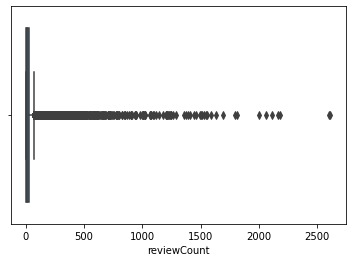

In [ ]:
sns.boxplot(df_train_reviewers.reviewCount)
plt.show()   

In [ ]:
df_train_reviewers[['reviewCount']].describe()

,reviewCount
count,16677.000000
mean,41.352581
std,113.975389
min,1.000000
25%,4.000000
50%,10.000000
75%,30.000000
max,2611.000000


In [ ]:
df_train.shape

(26958, 22)

In [ ]:
df_train[['reviewID', 'reviewCount','flagged']]

,reviewID,reviewCount,flagged
0,GtwU21YOQn-wf4vWRUIx6w,48,0
1,0LpVTc3,4,0
2,tljtLzf68Fkwf,11,0
3,iSN,60,0
4,Jmwrh7,1209,0
...,...,...,...
26953,PZu8sDx2T2,165,0
26954,S-zbPPGoB,11,0
26955,roKqXYooTy49OMAIJJjf,49,0
26956,FefmFaWa,49,0


In [ ]:
def addReviewCountLabel(row, threshold):
  
    if row['reviewCount'] > threshold:
        val = "Trusted_Reviewer"
    else:
        val = "Unverified_Reviewer"
    return val

df_train['reviewCountLabel'] = df_train.apply(addReviewCountLabel,threshold=30, axis=1)


In [ ]:
df_train[['reviewID', 'reviewCount','reviewCountLabel','flagged']]

,reviewID,reviewCount,reviewCountLabel,flagged
0,GtwU21YOQn-wf4vWRUIx6w,48,Trusted_Reviewer,0
1,0LpVTc3,4,Unverified_Reviewer,0
2,tljtLzf68Fkwf,11,Unverified_Reviewer,0
3,iSN,60,Trusted_Reviewer,0
4,Jmwrh7,1209,Trusted_Reviewer,0
...,...,...,...,...
26953,PZu8sDx2T2,165,Trusted_Reviewer,0
26954,S-zbPPGoB,11,Unverified_Reviewer,0
26955,roKqXYooTy49OMAIJJjf,49,Trusted_Reviewer,0
26956,FefmFaWa,49,Trusted_Reviewer,0


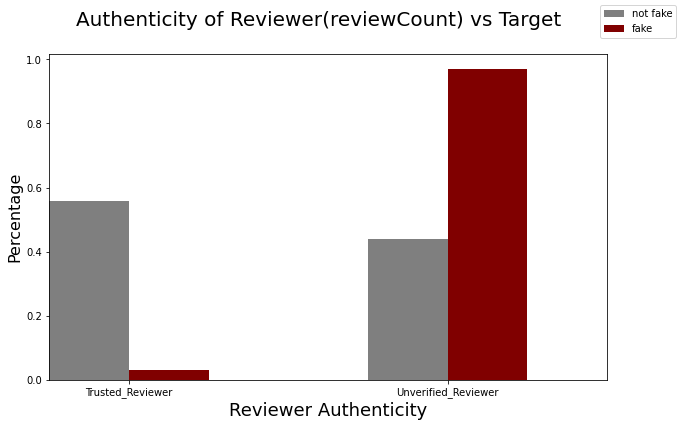

In [ ]:

# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

width = .25

fig = plt.figure(figsize=(10,6))

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

fig.suptitle('Authenticity of Reviewer(reviewCount) vs Target', fontsize=20)
plt.xlabel('Reviewer Authenticity', fontsize=18)
plt.ylabel('Percentage', fontsize=16)

target_0_df_train['reviewCountLabel'].value_counts(normalize=True).sort_index().plot(kind='bar', color = '#7f7f7f', position=1, width = width) #sort index is necessary
target_1_df_train['reviewCountLabel'].value_counts(normalize=True).sort_index().plot(kind='bar', color='maroon', position=0, width = width)  #sort index is necessary

fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
#If reviewer has written more than 30 reviews in their lifetime (trusted), percentage of genuine reviews (55%) is much more as compared to fake (3%) 
#If reviewer has written less than 30 reviews in their lifetime (unverified), percentage of genuine reviews (44%) is much less than fake (96%)


In [ ]:
#all genuine reviews
target_0_df_train['reviewCountLabel'].value_counts(normalize=True).sort_index()

Trusted_Reviewer       0.559079
Unverified_Reviewer    0.440921
Name: reviewCountLabel, dtype: float64

In [ ]:
#all fake reviews
target_1_df_train['reviewCountLabel'].value_counts(normalize=True).sort_index()

Trusted_Reviewer       0.030777
Unverified_Reviewer    0.969223
Name: reviewCountLabel, dtype: float64

In [ ]:
#Analysis about when first review was written after joining Yelp

In [ ]:
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,0,Scott E.,"Glengary, WV",...,48,5,41,5,5,2,0,1,4.5,497
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,0,Jerry K.,"Palos Verdes Peninsula, CA",...,4,0,0,0,0,0,0,0,4.5,41
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,0,Patricia M.,"Chicago, IL",...,11,0,6,0,1,0,0,0,4.5,27
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,0,Terry N.,"San Jose, CA",...,60,1,35,8,6,6,11,0,4.5,244
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,0,Shradha Vegetarianista A.,"Chicago, IL",...,1209,61,1650,679,417,283,22,70,4.5,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,v9qEDxi3t-P0CmGWAkkGvw,3/17/2010,4,0,it s taco bell higher prices taco bell what st...,0,Kristen F.,"Chicago, IL",...,165,33,201,56,17,24,0,3,4.0,48
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,RRflazDtBkqqpvEz2hbV2w,4/14/2011,5,0,yellow rose favorite mine i d go every day i c...,0,Yvonne F.,IL,...,11,2,7,2,0,1,0,1,4.0,63
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,zI0E_yruu58ea-xq9aHi-w,9/23/2007,3,0,not bad we ate odd wicker seats inviting we at...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,27
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,6XVXM78gBuU3gpq2hTOgJA,11/18/2011,3,0,we surprised eagerly roped pop trivia game upo...,0,Saverio T.,"Chicago, IL",...,49,7,58,9,10,7,1,1,4.0,42


In [ ]:
df_train.yelpJoinDate

0          October 2009
1             June 2011
2        September 2008
3          October 2007
4             July 2007
              ...      
26953        April 2006
26954      January 2007
26955    September 2007
26956    September 2007
26957       August 2011
Name: yelpJoinDate, Length: 26958, dtype: object

In [ ]:
df_train.yelpJoinDate.nunique()

96

,reviewerID,reviewCount,yelpJoinDate,date,flagged
0,--1-HgcfL1vWbG-1hgn1oA,1,August 2012,8/14/2012,1
1,--AGQM8GPHljgKdnLisXgQ,2,August 2008,8/22/2008,1
2,--KQJPdrU0Md97DiOliDzw,163,January 2006,8/20/2011,0
3,--KXo_HCYq9hB8NOdEUMKw,4,April 2010,4/22/2010,0
4,--Qh8yKWAvIP4V4K8ZPfHA,161,January 2011,4/12/2012,0
...,...,...,...,...,...
16672,zyAnv_LLfIIuqXGaBS9F5Q,33,July 2008,10/10/2011,0
16673,zyCUBfCjEidb3nMbUDWyfA,76,November 2006,1/4/2011,0
16674,zyIvm84qHPkXzdQWMwZGwg,55,May 2008,6/2/2008,0
16675,zyWj2xkEWmH4TH_OeZC5Nw,9,June 2010,6/23/2010,1


In [ ]:
df_train['reviewTimestamp'] = pd.to_datetime(df_train["date"])
df_train[['reviewID', 'reviewerID','date','reviewTimestamp']]

,reviewID,reviewerID,date,reviewTimestamp
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,9/22/2012,2012-09-22
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,9/22/2012,2012-09-22
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,9/19/2012,2012-09-19
3,iSN,DlwexC7z88ymAzu45skODw,9/6/2012,2012-09-06
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,9/9/2012,2012-09-09
...,...,...,...,...
26953,PZu8sDx2T2,tivh8lr6pzBDNfrJLYWh_g,3/17/2010,2010-03-17
26954,S-zbPPGoB,jKs4FQgkV0wSX8BG2_dgTg,4/14/2011,2011-04-14
26955,roKqXYooTy49OMAIJJjf,vX6aOMQ3HWCbwZVfCkCauw,9/23/2007,2007-09-23
26956,FefmFaWa,vX6aOMQ3HWCbwZVfCkCauw,11/18/2011,2011-11-18


In [ ]:
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,reviewTimestamp
8566,0SrCYAgRABdfUy,Kx_eu0rIJk7oGXHtrtBUDQ,sR4EOfPuI-at41uIxIZPhw,11/24/2004,5,1,great selection amazing beer s great presentat...,0,Liz C.,"Chicago, IL",...,18,20,5,3,2,0,0,4.0,25,2004-11-24
19857,ljgQ5vFw6za93LGdyK1M5w,Kx_eu0rIJk7oGXHtrtBUDQ,WaIbupMGDBi5B3SChsUH8A,11/24/2004,5,1,great interesting cuban mexican menu very tasty,0,Liz C.,"Chicago, IL",...,18,20,5,3,2,0,0,4.0,7,2004-11-24
10265,kW2xN5Hn6o0P5wiTc4EggA,JZ9APfPkwUmrVoxofhEeEg,ms5ge1XY9-Alu7HkybAMdQ,11/24/2004,5,0,can t think place pizza know i m lame haha,0,Susi Little Mama D.,"Bolingbrook, IL",...,31,107,60,41,27,0,1,3.5,10,2004-11-24
10718,GFv6pqpOEIxNmYGe11BGxA,lZsusXJjzStoi3vQmqzoMg,4wreIFjaPMppyEnzKHbozg,4/15/2005,3,0,owned cheesecake factory similar the generous ...,0,Joe R.,"San Francisco, CA",...,81,175,92,108,35,0,8,3.5,19,2005-04-15
21070,XqZkmOeM65OyO-KZ7dyhag,Bf87HcPERF9yiSjb2tQBqw,rnjz2KNgsQ2YaC_kjeuuAQ,6/12/2005,3,2,a great steak deserves great baked potato in f...,0,Kevin S.,"San Francisco, CA",...,896,3905,3837,3914,2469,244,138,4.0,120,2005-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21894,D7yDKFDJivHnawchLBRdvA,xkdpUZC6_2K-e3EYRAaxbg,h-CNRJ-bqSZvz75J4A9cFg,9/23/2012,3,0,went today brunch mom roommate brunch menu opi...,0,Stephanie M.,"Chicago, IL",...,0,0,0,0,0,0,0,3.5,71,2012-09-23
22050,GLHon,OaMIUWkUfwx0Edl9SNyx-w,IuFEm-19YYh49T5ZlvwkDA,9/23/2012,5,0,just awesome can t wait go back try more,0,Joel R.,"Chicago, IL",...,0,1,0,0,1,0,0,4.5,9,2012-09-23
22605,O2xS,5OQbt2SbGUqunDLgjjNLDg,yBRaSkuYwFhYEoucDyD0lA,9/23/2012,1,0,we opted delivery driver much hurry deliver ap...,0,Joan JoanB B.,"Chicago, IL",...,0,2,0,2,0,0,0,4.0,64,2012-09-23
22997,aKu3c0tK,RDmV0KKFtdLZ1Nj9npo3fg,Btjt4D8dJ-yEdsts3Tj5Hg,9/23/2012,4,0,we ball last night charming andersonville rest...,0,S D.,"Oak Park, IL",...,2,15,2,2,1,0,0,3.5,130,2012-09-23


In [ ]:
df_train['joinTimestamp'] = pd.to_datetime(df_train['yelpJoinDate'],format='%B %Y')
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,reviewTimestamp,joinTimestamp
8566,0SrCYAgRABdfUy,Kx_eu0rIJk7oGXHtrtBUDQ,sR4EOfPuI-at41uIxIZPhw,11/24/2004,5,1,great selection amazing beer s great presentat...,0,Liz C.,"Chicago, IL",...,20,5,3,2,0,0,4.0,25,2004-11-24,2004-10-01
19857,ljgQ5vFw6za93LGdyK1M5w,Kx_eu0rIJk7oGXHtrtBUDQ,WaIbupMGDBi5B3SChsUH8A,11/24/2004,5,1,great interesting cuban mexican menu very tasty,0,Liz C.,"Chicago, IL",...,20,5,3,2,0,0,4.0,7,2004-11-24,2004-10-01
10265,kW2xN5Hn6o0P5wiTc4EggA,JZ9APfPkwUmrVoxofhEeEg,ms5ge1XY9-Alu7HkybAMdQ,11/24/2004,5,0,can t think place pizza know i m lame haha,0,Susi Little Mama D.,"Bolingbrook, IL",...,107,60,41,27,0,1,3.5,10,2004-11-24,2004-11-01
10718,GFv6pqpOEIxNmYGe11BGxA,lZsusXJjzStoi3vQmqzoMg,4wreIFjaPMppyEnzKHbozg,4/15/2005,3,0,owned cheesecake factory similar the generous ...,0,Joe R.,"San Francisco, CA",...,175,92,108,35,0,8,3.5,19,2005-04-15,2005-02-01
21070,XqZkmOeM65OyO-KZ7dyhag,Bf87HcPERF9yiSjb2tQBqw,rnjz2KNgsQ2YaC_kjeuuAQ,6/12/2005,3,2,a great steak deserves great baked potato in f...,0,Kevin S.,"San Francisco, CA",...,3905,3837,3914,2469,244,138,4.0,120,2005-06-12,2005-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21894,D7yDKFDJivHnawchLBRdvA,xkdpUZC6_2K-e3EYRAaxbg,h-CNRJ-bqSZvz75J4A9cFg,9/23/2012,3,0,went today brunch mom roommate brunch menu opi...,0,Stephanie M.,"Chicago, IL",...,0,0,0,0,0,0,3.5,71,2012-09-23,2012-09-01
22050,GLHon,OaMIUWkUfwx0Edl9SNyx-w,IuFEm-19YYh49T5ZlvwkDA,9/23/2012,5,0,just awesome can t wait go back try more,0,Joel R.,"Chicago, IL",...,1,0,0,1,0,0,4.5,9,2012-09-23,2012-08-01
22605,O2xS,5OQbt2SbGUqunDLgjjNLDg,yBRaSkuYwFhYEoucDyD0lA,9/23/2012,1,0,we opted delivery driver much hurry deliver ap...,0,Joan JoanB B.,"Chicago, IL",...,2,0,2,0,0,0,4.0,64,2012-09-23,2010-02-01
22997,aKu3c0tK,RDmV0KKFtdLZ1Nj9npo3fg,Btjt4D8dJ-yEdsts3Tj5Hg,9/23/2012,4,0,we ball last night charming andersonville rest...,0,S D.,"Oak Park, IL",...,15,2,2,1,0,0,3.5,130,2012-09-23,2010-06-01


In [ ]:
df_train[['reviewerID','reviewCount','yelpJoinDate','joinTimestamp','date','reviewTimestamp','flagged']]

,reviewerID,reviewCount,yelpJoinDate,joinTimestamp,date,reviewTimestamp,flagged
8566,Kx_eu0rIJk7oGXHtrtBUDQ,22,October 2004,2004-10-01,11/24/2004,2004-11-24,0
19857,Kx_eu0rIJk7oGXHtrtBUDQ,22,October 2004,2004-10-01,11/24/2004,2004-11-24,0
10265,JZ9APfPkwUmrVoxofhEeEg,91,November 2004,2004-11-01,11/24/2004,2004-11-24,0
10718,lZsusXJjzStoi3vQmqzoMg,258,February 2005,2005-02-01,4/15/2005,2005-04-15,0
21070,Bf87HcPERF9yiSjb2tQBqw,1589,January 2005,2005-01-01,6/12/2005,2005-06-12,0
...,...,...,...,...,...,...,...
21894,xkdpUZC6_2K-e3EYRAaxbg,3,September 2012,2012-09-01,9/23/2012,2012-09-23,0
22050,OaMIUWkUfwx0Edl9SNyx-w,5,August 2012,2012-08-01,9/23/2012,2012-09-23,0
22605,5OQbt2SbGUqunDLgjjNLDg,8,February 2010,2010-02-01,9/23/2012,2012-09-23,0
22997,RDmV0KKFtdLZ1Nj9npo3fg,29,June 2010,2010-06-01,9/23/2012,2012-09-23,0


In [ ]:
df_train['dateDifference'] = (df_train['reviewTimestamp'] - df_train['joinTimestamp']).dt.days
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,reviewTimestamp,joinTimestamp,dateDifference
8566,0SrCYAgRABdfUy,Kx_eu0rIJk7oGXHtrtBUDQ,sR4EOfPuI-at41uIxIZPhw,11/24/2004,5,1,great selection amazing beer s great presentat...,0,Liz C.,"Chicago, IL",...,5,3,2,0,0,4.0,25,2004-11-24,2004-10-01,54
19857,ljgQ5vFw6za93LGdyK1M5w,Kx_eu0rIJk7oGXHtrtBUDQ,WaIbupMGDBi5B3SChsUH8A,11/24/2004,5,1,great interesting cuban mexican menu very tasty,0,Liz C.,"Chicago, IL",...,5,3,2,0,0,4.0,7,2004-11-24,2004-10-01,54
10265,kW2xN5Hn6o0P5wiTc4EggA,JZ9APfPkwUmrVoxofhEeEg,ms5ge1XY9-Alu7HkybAMdQ,11/24/2004,5,0,can t think place pizza know i m lame haha,0,Susi Little Mama D.,"Bolingbrook, IL",...,60,41,27,0,1,3.5,10,2004-11-24,2004-11-01,23
10718,GFv6pqpOEIxNmYGe11BGxA,lZsusXJjzStoi3vQmqzoMg,4wreIFjaPMppyEnzKHbozg,4/15/2005,3,0,owned cheesecake factory similar the generous ...,0,Joe R.,"San Francisco, CA",...,92,108,35,0,8,3.5,19,2005-04-15,2005-02-01,73
21070,XqZkmOeM65OyO-KZ7dyhag,Bf87HcPERF9yiSjb2tQBqw,rnjz2KNgsQ2YaC_kjeuuAQ,6/12/2005,3,2,a great steak deserves great baked potato in f...,0,Kevin S.,"San Francisco, CA",...,3837,3914,2469,244,138,4.0,120,2005-06-12,2005-01-01,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21894,D7yDKFDJivHnawchLBRdvA,xkdpUZC6_2K-e3EYRAaxbg,h-CNRJ-bqSZvz75J4A9cFg,9/23/2012,3,0,went today brunch mom roommate brunch menu opi...,0,Stephanie M.,"Chicago, IL",...,0,0,0,0,0,3.5,71,2012-09-23,2012-09-01,22
22050,GLHon,OaMIUWkUfwx0Edl9SNyx-w,IuFEm-19YYh49T5ZlvwkDA,9/23/2012,5,0,just awesome can t wait go back try more,0,Joel R.,"Chicago, IL",...,0,0,1,0,0,4.5,9,2012-09-23,2012-08-01,53
22605,O2xS,5OQbt2SbGUqunDLgjjNLDg,yBRaSkuYwFhYEoucDyD0lA,9/23/2012,1,0,we opted delivery driver much hurry deliver ap...,0,Joan JoanB B.,"Chicago, IL",...,0,2,0,0,0,4.0,64,2012-09-23,2010-02-01,965
22997,aKu3c0tK,RDmV0KKFtdLZ1Nj9npo3fg,Btjt4D8dJ-yEdsts3Tj5Hg,9/23/2012,4,0,we ball last night charming andersonville rest...,0,S D.,"Oak Park, IL",...,2,2,1,0,0,3.5,130,2012-09-23,2010-06-01,845


In [ ]:
df_train = df_train.sort_values(by='reviewTimestamp')
df_train

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,reviewTimestamp,joinTimestamp,dateDifference
8566,0SrCYAgRABdfUy,Kx_eu0rIJk7oGXHtrtBUDQ,sR4EOfPuI-at41uIxIZPhw,11/24/2004,5,1,great selection amazing beer s great presentat...,0,Liz C.,"Chicago, IL",...,5,3,2,0,0,4.0,25,2004-11-24,2004-10-01,54
19857,ljgQ5vFw6za93LGdyK1M5w,Kx_eu0rIJk7oGXHtrtBUDQ,WaIbupMGDBi5B3SChsUH8A,11/24/2004,5,1,great interesting cuban mexican menu very tasty,0,Liz C.,"Chicago, IL",...,5,3,2,0,0,4.0,7,2004-11-24,2004-10-01,54
10265,kW2xN5Hn6o0P5wiTc4EggA,JZ9APfPkwUmrVoxofhEeEg,ms5ge1XY9-Alu7HkybAMdQ,11/24/2004,5,0,can t think place pizza know i m lame haha,0,Susi Little Mama D.,"Bolingbrook, IL",...,60,41,27,0,1,3.5,10,2004-11-24,2004-11-01,23
10718,GFv6pqpOEIxNmYGe11BGxA,lZsusXJjzStoi3vQmqzoMg,4wreIFjaPMppyEnzKHbozg,4/15/2005,3,0,owned cheesecake factory similar the generous ...,0,Joe R.,"San Francisco, CA",...,92,108,35,0,8,3.5,19,2005-04-15,2005-02-01,73
21070,XqZkmOeM65OyO-KZ7dyhag,Bf87HcPERF9yiSjb2tQBqw,rnjz2KNgsQ2YaC_kjeuuAQ,6/12/2005,3,2,a great steak deserves great baked potato in f...,0,Kevin S.,"San Francisco, CA",...,3837,3914,2469,244,138,4.0,120,2005-06-12,2005-01-01,162
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13529,R0LbqiNL5ApM2tiX8lddsg,Lr9A78QDWwm-vUinXcKXdA,HOJqzz1WvOmeR9oESJ4d9A,9/23/2012,5,0,sonoran dog jalape帽o cheese beef dog jalape帽o ...,0,Kathryn F.,"Chicago, IL",...,46,29,11,41,3,4.5,66,2012-09-23,2008-01-01,1727
22366,3cXwgYTCJ4gu6ezmkKx7Pg,KVeT8BBQByow7Vayd7Vg1A,yBRaSkuYwFhYEoucDyD0lA,9/23/2012,1,0,our favorite chinese restaurant 10 years servi...,0,Allan F.,"Chicago, IL",...,0,0,0,0,0,4.0,23,2012-09-23,2012-09-01,22
22997,aKu3c0tK,RDmV0KKFtdLZ1Nj9npo3fg,Btjt4D8dJ-yEdsts3Tj5Hg,9/23/2012,4,0,we ball last night charming andersonville rest...,0,S D.,"Oak Park, IL",...,2,2,1,0,0,3.5,130,2012-09-23,2010-06-01,845
583,Hz36wKCggsT9czAs5SzSyQ,bNYesZ944s6IJVowOnB0iA,boE4Ahsssqic7o5wQLI04w,9/23/2012,4,0,the purple pig one restaurants i wanted try ch...,0,Scott E.,"Glengary, WV",...,5,5,2,0,1,4.0,227,2012-09-23,2009-10-01,1088


In [ ]:
df_train_reviewers = df_train.groupby('reviewerID').nth(0).reset_index() #get first row of each unique reviewer
df_train_reviewers = df_train_reviewers[['reviewerID','reviewCount','yelpJoinDate','date','reviewTimestamp','dateDifference','flagged']]
df_train_reviewers

,reviewerID,reviewCount,yelpJoinDate,date,reviewTimestamp,dateDifference,flagged
0,--1-HgcfL1vWbG-1hgn1oA,1,August 2012,8/14/2012,2012-08-14,13,1
1,--AGQM8GPHljgKdnLisXgQ,2,August 2008,8/22/2008,2008-08-22,21,1
2,--KQJPdrU0Md97DiOliDzw,163,January 2006,8/20/2011,2011-08-20,2057,0
3,--KXo_HCYq9hB8NOdEUMKw,4,April 2010,4/22/2010,2010-04-22,21,0
4,--Qh8yKWAvIP4V4K8ZPfHA,161,January 2011,4/12/2012,2012-04-12,467,0
...,...,...,...,...,...,...,...
16672,zyAnv_LLfIIuqXGaBS9F5Q,33,July 2008,10/10/2011,2011-10-10,1196,0
16673,zyCUBfCjEidb3nMbUDWyfA,76,November 2006,1/4/2011,2011-01-04,1525,0
16674,zyIvm84qHPkXzdQWMwZGwg,55,May 2008,5/29/2008,2008-05-29,28,0
16675,zyWj2xkEWmH4TH_OeZC5Nw,9,June 2010,6/23/2010,2010-06-23,22,1


In [ ]:
#checking

In [ ]:
df_train[df_train['reviewerID']=='P_pk7ld02y4Cf7S-DOwIzw']

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,reviewTimestamp,joinTimestamp,dateDifference
3799,gDdEu-y0VFESrAzGvxGB5w,P_pk7ld02y4Cf7S-DOwIzw,jGiKIJCVLZHXQDSNnSLPsw,5/12/2010,5,3,i vegetarian caldo spanish soup awesome great ...,0,Sandra Gardenia T.,"Chicago, IL",...,391,249,344,233,6,4.0,87,2010-05-12,2010-01-01,131
1336,C-y91PJRAc9cNzZRDxtCkg,P_pk7ld02y4Cf7S-DOwIzw,IvdOI86_CSCRFpid2atnyA,9/19/2010,5,3,went dry run great job they tons experience i ...,0,Sandra Gardenia T.,"Chicago, IL",...,391,249,344,233,6,4.0,61,2010-09-19,2010-01-01,261
23310,WwgFPlliKXtCTndKR1vpXA,P_pk7ld02y4Cf7S-DOwIzw,ElCbMJRjgu9LDj4MxOKXew,7/23/2012,5,1,great service i know given sorry not so i real...,0,Sandra Gardenia T.,"Chicago, IL",...,391,249,344,233,6,4.0,74,2012-07-23,2010-01-01,934
6264,3IdvJTj4ITCILj94f3Pq9A,P_pk7ld02y4Cf7S-DOwIzw,o54U2VkQama8FI30qDkWvw,7/23/2012,1,3,my vegan meet group walked dessert lunch i tas...,0,Sandra Gardenia T.,"Chicago, IL",...,391,249,344,233,6,4.0,235,2012-07-23,2010-01-01,934


In [ ]:
df_train_reviewers[df_train_reviewers['reviewerID']=='P_pk7ld02y4Cf7S-DOwIzw']

,reviewerID,reviewCount,yelpJoinDate,date,reviewTimestamp,dateDifference,flagged
6924,P_pk7ld02y4Cf7S-DOwIzw,178,January 2010,5/12/2010,2010-05-12,131,0


In [ ]:
#yes we are getting the earliest reviews in the dataframe "df_train_reviewers"

In [ ]:
df_train_reviewers['dateDifference'].describe()

count    16677.000000
mean       292.065599
std        386.438198
min          0.000000
25%         22.000000
50%        105.000000
75%        444.000000
max       2553.000000
Name: dateDifference, dtype: float64

In [ ]:
df_train_same_month_as_join = df_train[df_train['dateDifference'] <=30]
df_train_same_month_as_join['flagged'].value_counts()

1    3907
0    3001
Name: flagged, dtype: int64

In [ ]:
#Analysis of Rating as per label

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/dis

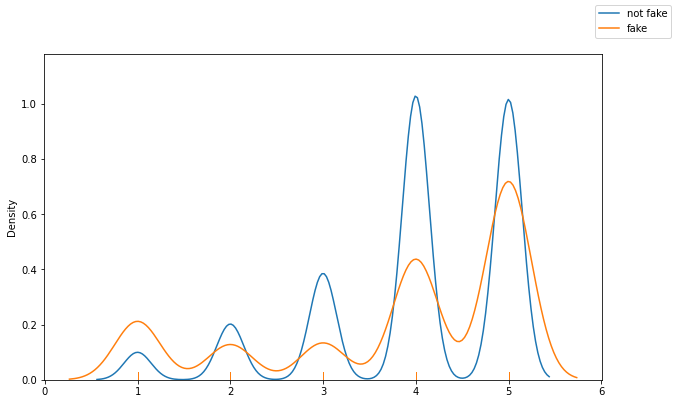

In [ ]:
# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

fig = plt.figure(figsize=(10,6))

sns.distplot(target_0_df_train[['rating']], hist=False, rug=True)
sns.distplot(target_1_df_train[['rating']], hist=False, rug=True)

fig.legend(labels=['not fake','fake'])
plt.show()


In [ ]:
#Find count of each rating for both dataframes

In [ ]:
#genuine reviews
target_0_df_train['rating'].value_counts().sort_index() #sort_index is necessary

1     757
2    1535
3    2929
4    7815
5    7716
Name: rating, dtype: int64

In [ ]:
#fake reviews
target_1_df_train['rating'].value_counts().sort_index() #sort_index is necessary

1     807
2     487
3     509
4    1665
5    2738
Name: rating, dtype: int64

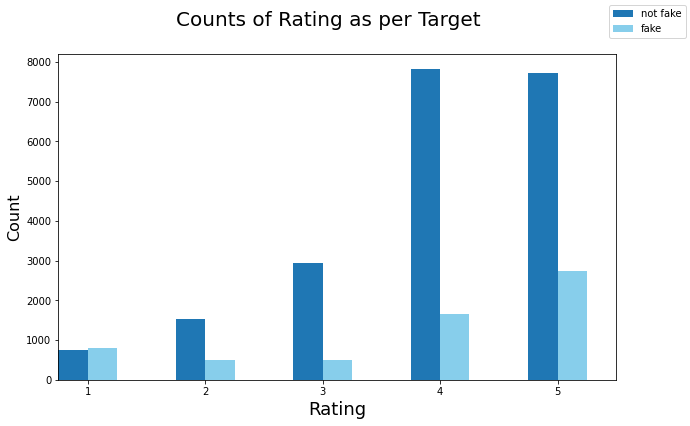

In [ ]:

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Counts of Rating as per Target', fontsize=20)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Count', fontsize=16)

target_0_df_train['rating'].value_counts().sort_index().plot(kind='bar', position=1, width = width)
target_1_df_train['rating'].value_counts().sort_index().plot(kind='bar', color='skyblue', position=0, width = width)


fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()



In [ ]:
#genuine reviews
target_0_df_train['rating'].value_counts().sort_index() #sort_index is necessary

1     757
2    1535
3    2929
4    7815
5    7716
Name: rating, dtype: int64

In [ ]:
#fake reviews
target_1_df_train['rating'].value_counts().sort_index() #sort_index is necessary

1     807
2     487
3     509
4    1665
5    2738
Name: rating, dtype: int64

In [ ]:
#genuine reviews
target_0_df_train['rating'].value_counts(normalize=True).sort_index() #sort_index is necessary

1    0.036478
2    0.073969
3    0.141143
4    0.376590
5    0.371820
Name: rating, dtype: float64

In [ ]:
#fake reviews
target_1_df_train['rating'].value_counts(normalize=True).sort_index() #sort_index is necessary

1    0.130035
2    0.078472
3    0.082017
4    0.268289
5    0.441186
Name: rating, dtype: float64

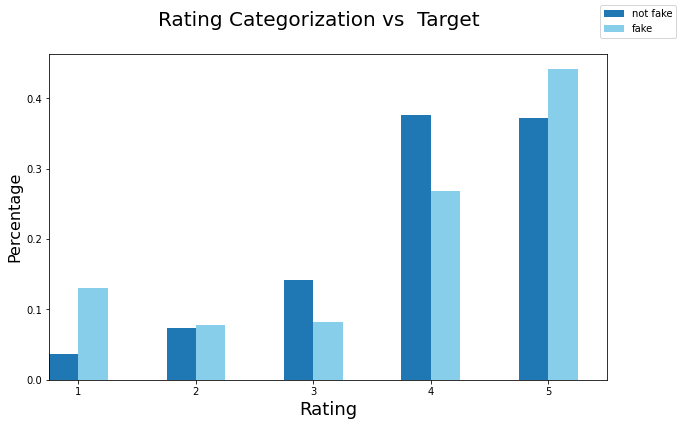

In [ ]:

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Rating Categorization vs  Target', fontsize=20)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Percentage', fontsize=16)

target_0_df_train['rating'].value_counts(normalize=True).sort_index().plot(kind='bar', position=1, width = width)
target_1_df_train['rating'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue', position=0, width = width)


fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
#To Do:

#Variation 1:
#Create a cateogrical column with 3 categories: Low rating (1 and 2), Moderate rating (3), High rating (4,5) and then do same analysis 


In [ ]:
def label_rating (row):
   if row['rating'] == 3 :
      return 'Moderate'
   if row['rating'] >=4 and row['rating'] <=5:
      return 'High'
   if row['rating'] >=1 and row['rating'] <=2:
      return 'Low'   

In [ ]:
df_train.apply (lambda row: label_rating(row), axis=1)

0            High
1            High
2        Moderate
3        Moderate
4            High
           ...   
26953        High
26954        High
26955    Moderate
26956    Moderate
26957        High
Length: 26958, dtype: object

In [ ]:
df_train['rating_label'] = df_train.apply (lambda row: label_rating(row), axis=1)
df_train.sample(n=10)

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,rating_label
15967,y47gphRbxB8BkXG3-yqImQ,cKQNuN_eIeu3w_eDnEUumg,LMaoM2Ue2BR_HI9ba3JsZg,6/15/2010,5,0,sunday brunch dynamite these plates delicious ...,0,E L.,"Chicago, IL",...,1,6,1,1,1,0,0,4.0,136,High
20053,ECoc4GSaniixfKajcLjc9w,LJ8U5ZVnFpF8XNUR7DcUng,DXwSYgiXqIVNdO9dazel6w,11/16/2006,3,3,i like place i really do i love caramelized ch...,0,Rob L.,"Chicago, IL",...,49,3956,3743,2855,5678,20,78,4.0,107,Moderate
9871,NXZPhCbWSrl2GVIHtKLIRg,CwUn_CAkj6c21zZAMP381Q,qqax04alS3UPx0Yp4jJNDQ,1/5/2010,4,0,milk honey decent breakfast i feel they re bit...,1,Sharan G.,"Chicago, IL",...,0,1,1,0,0,0,0,3.5,35,High
5262,Ne9FeeQBBpH9V,VP7MygugFl4gduIATDyJzA,o4NcUfco7JxOcyfKFWyAhg,11/16/2009,4,0,i eaten several times time really enjoyed myse...,0,Katie G.,"Chicago, IL",...,4,37,5,6,3,0,0,4.0,43,High
8999,jiCHjjPOiXLWcFvPXZE1kA,6MhoYwUbOUkBQ02fUpbfiQ,n3VjBryfinjRG1W3LWsPBQ,6/8/2006,4,2,this place great a small gourmet grocery lots ...,0,Lisa T.,"Chicago, IL",...,5,129,39,16,27,0,1,3.5,38,High
23152,WJaiFe9wsMzcKmL5UqGvTQ,o_CiSI6eGERJaqOCMDXtpQ,Btjt4D8dJ-yEdsts3Tj5Hg,10/26/2011,3,0,i impressed i ordered here there restaurants a...,1,sarah y.,"Chicago, IL",...,0,0,0,0,0,0,0,3.5,13,Moderate
11259,xnxYsZrEdLtdt5,_ShyLzKR9TBbfC6g1xu9yQ,d6UbRb9W5eA1yL-DuVZ8ug,9/11/2009,4,0,came chicago vacation labor day wanted go plac...,0,Kathryn KPlum P.,"Dallas, TX",...,4,375,195,154,100,0,17,4.0,69,High
22625,SQSX02IfewGnmf_nBIE-dA,ynGJoGC8itO_N6st_21RxA,yBRaSkuYwFhYEoucDyD0lA,1/24/2010,5,0,highly recommended i live lisle illinois i fre...,1,Asa S.,"Lisle, IL",...,1,1,0,0,0,0,0,4.0,53,High
17986,4CnV9w4raQFQR_NCb4y3hw,_49UyDzFEsSyZUVF6Q1E1A,m5_GCJP2W4zEJnyVgxa3eA,1/21/2011,5,0,kind long line food great i pleased different ...,1,tod p.,"Chicago, IL",...,0,3,0,0,0,0,0,4.0,15,High
5913,3O4IHQ0saBliekrktjiTDg,64opG9PWNcD4FVkErwW0MA,N7juvW8YoFIj7sEBzVF8GQ,12/7/2009,2,0,it ok it anything special you could make food ...,0,Pat F.,"Chicago, IL",...,1,13,7,3,1,7,1,4.0,29,Low


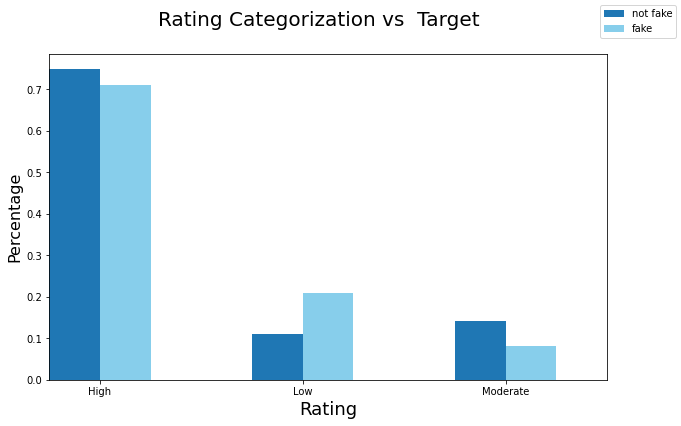

In [ ]:



# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Rating Categorization vs  Target', fontsize=20)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Percentage', fontsize=16)

target_0_df_train['rating_label'].value_counts(normalize=True).sort_index().plot(kind='bar', position=1, width = width)
target_1_df_train['rating_label'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue', position=0, width = width)


fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
#genuine reviews
target_0_df_train['rating_label'].value_counts(normalize=True).sort_index()

High        0.748410
Low         0.110447
Moderate    0.141143
Name: rating_label, dtype: float64

In [ ]:
#fake reviews
target_1_df_train['rating_label'].value_counts(normalize=True).sort_index()

High        0.709475
Low         0.208508
Moderate    0.082017
Name: rating_label, dtype: float64

In [ ]:
#Variation 2:
#Create a cateogrical column with 3 categories: Low rating (1), Moderate rating (2,3,4), High rating (5) and then do same analysis 


In [ ]:
def label_rating (row):
   if row['rating'] == 1 :
      return 'Low'
   if row['rating'] >=2 and row['rating'] <=4:
      return 'Moderate'
   if row['rating'] ==5:
      return 'High'   

In [ ]:
df_train['rating_label'] = df_train.apply (lambda row: label_rating(row), axis=1)
df_train.sample(n=10)

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,review_length_label,rating_label
12872,xxjgjqKiVqdIgLhacRa2WA,md6cBleA4yYQ6IwHL_pApA,dKcO9OQ44RPRlkWe-vToFA,4/7/2011,3,0,visited shaw s sushi service ok food ok nothin...,1,Amelia The-Amelia K.,"Oswego, IL",...,1,1,0,0,1,0,4.0,19,Short Review,Moderate
11730,wGLzGP3lLk7IzfTb2U9BRg,3XM3JrKxUaSn_tpqjjTckA,08X_5WTOVNvk4SgPRKBjjQ,11/4/2007,4,1,this place greasy yummy their margaritas prett...,0,Megan B.,"Chicago, IL",...,52,30,11,0,0,0,3.5,63,Long Review,Moderate
16799,iWuClJXKmNfQjPiEzcwzAg,gyrCZUplMrEDCbQXjaUEZA,50gFzdVglOz88eFJ6v-26A,8/25/2010,2,3,fresh fish cereal smorgasbord odd couple seem ...,0,Adrie LoveyDove G.,"Chicago, IL",...,32,15,16,2,0,0,4.0,93,Long Review,Moderate
11377,bJdscZNavwrT4mW7ujqdSQ,ZiRdBb0WEyX_arb7felgLA,d6UbRb9W5eA1yL-DuVZ8ug,11/14/2010,2,0,this first time dining zen i ve walked past si...,0,Jason J-Man L.,"Chicago, IL",...,8,1,1,0,0,0,4.0,110,Long Review,Moderate
16246,bSfBogkb1cdKuau449Jzwg,eHKGA3AfBaJMt90rz4x2QQ,AqgG-1aD6JYj9D6OmBWO3w,12/22/2011,3,0,not impressed all i expecting name,1,Kari g.,"Chicago, IL",...,1,0,0,0,0,0,4.0,6,Short Review,Moderate
23778,eUQOxJUQahXujGLEcZjFKQ,x13yoEggBL0pIE7-KMnhDQ,cQnY_VneZisfUAqcbuEuKg,9/22/2009,4,0,great mexican food far go regular basis the st...,0,Laura M.,"Oak Lawn, IL",...,213,90,33,87,0,3,4.0,45,Short Review,Moderate
2447,jdJTDM8kNaKoV3u-U8-azg,HiAhcDNlROXWS9nZ3drK1Q,Z2nOMPedr7XYhgYhILJjEA,9/13/2009,3,0,alright i generally like place good things fir...,1,Marc M.,"Chicago, IL",...,0,2,1,0,0,0,4.0,124,Long Review,Moderate
8258,qnoNvW9c6e-6-IeS2RNrjg,uYwcYKpDELHfVbiNcQKCoA,tCkwBTuEFvhuaBoEUWqbuQ,4/12/2012,5,0,my favorite breakfast place food always fresh ...,0,Tanya S.,"Chicago, IL",...,6,1,1,0,1,0,4.0,16,Short Review,High
21173,H6os3VpH3GwPs2bJ90R8iQ,rNT4n7T959b4F0EQ7GhjOA,1QKqtC4vML3QhkrSzwR_tQ,11/13/2011,4,0,this regular place me i somewhat sushi snob i ...,0,Nick S.,"Chicago, IL",...,0,0,0,0,0,0,3.5,56,Short Review,Moderate
11403,nypsplgWctJVlGoVTLrjUA,R_62BIqz1G6Yeb0QpfQkog,d6UbRb9W5eA1yL-DuVZ8ug,2/15/2011,4,0,the sunday brunch amazing think brazillian ste...,0,Thomas B.,"Chicago, IL",...,21,4,7,0,0,1,4.0,65,Long Review,Moderate


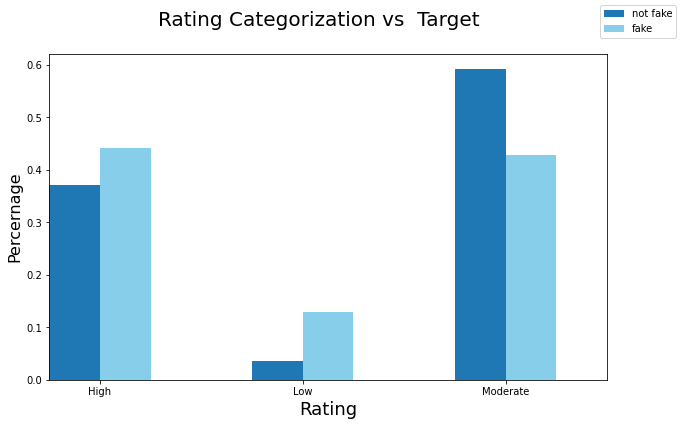

In [ ]:
# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Rating Categorization vs  Target', fontsize=20)
plt.xlabel('Rating', fontsize=18)
plt.ylabel('Percernage', fontsize=16)

target_0_df_train['rating_label'].value_counts(normalize=True).sort_index().plot(kind='bar', position=1, width = width)
target_1_df_train['rating_label'].value_counts(normalize=True).sort_index().plot(kind='bar', color='skyblue', position=0, width = width)


fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
#genuine reviews
target_0_df_train['rating_label'].value_counts(normalize=True).sort_index()

High        0.371820
Low         0.036478
Moderate    0.591702
Name: rating_label, dtype: float64

In [ ]:
#fake reviews
target_1_df_train['rating_label'].value_counts(normalize=True).sort_index()

High        0.441186
Low         0.130035
Moderate    0.428779
Name: rating_label, dtype: float64

In [ ]:
#Analysis of friendCount as per label

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


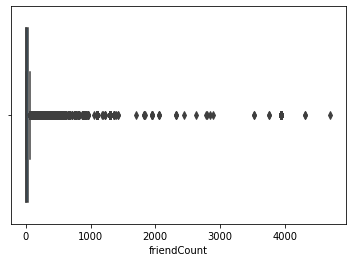

In [ ]:
sns.boxplot(df_train.friendCount)
plt.show()   

In [ ]:
df_train.friendCount.describe()

count    26958.000000
mean        47.704540
std        220.793656
min          0.000000
25%          0.000000
50%          5.000000
75%         27.000000
max       4706.000000
Name: friendCount, dtype: float64

In [ ]:
df_train[['reviewID', 'friendCount','flagged']]

,reviewID,friendCount,flagged
0,GtwU21YOQn-wf4vWRUIx6w,11,0
1,0LpVTc3,0,0
2,tljtLzf68Fkwf,2,0
3,iSN,84,0
4,Jmwrh7,333,0
...,...,...,...
26953,PZu8sDx2T2,31,0
26954,S-zbPPGoB,6,0
26955,roKqXYooTy49OMAIJJjf,13,0
26956,FefmFaWa,13,0


In [ ]:
def addf_trainriendCountLabel(row, threshold):
  
    if row['friendCount'] > threshold:
        val = "Popular_Reviewer"
    else:
        val = "Unknown_Reviewer"
    return val

df_train['friendCountLabel'] = df_train.apply(addf_trainriendCountLabel,threshold=30, axis=1)

df_train[['reviewID', 'friendCount','friendCountLabel','flagged']]

,reviewID,friendCount,friendCountLabel,flagged
0,GtwU21YOQn-wf4vWRUIx6w,11,Unknown_Reviewer,0
1,0LpVTc3,0,Unknown_Reviewer,0
2,tljtLzf68Fkwf,2,Unknown_Reviewer,0
3,iSN,84,Popular_Reviewer,0
4,Jmwrh7,333,Popular_Reviewer,0
...,...,...,...,...
26953,PZu8sDx2T2,31,Popular_Reviewer,0
26954,S-zbPPGoB,6,Unknown_Reviewer,0
26955,roKqXYooTy49OMAIJJjf,13,Unknown_Reviewer,0
26956,FefmFaWa,13,Unknown_Reviewer,0


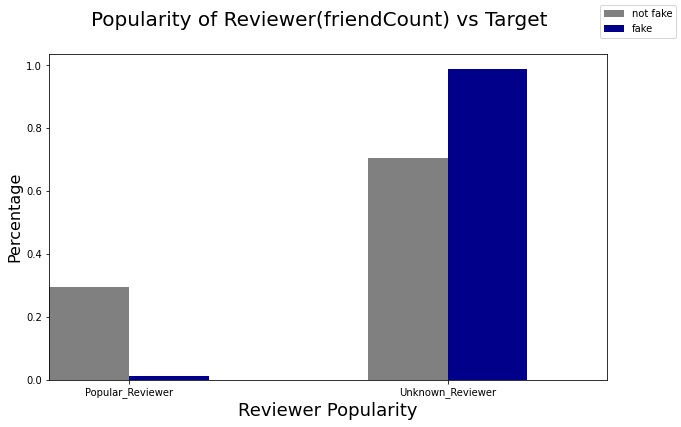

In [ ]:
# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Popularity of Reviewer(friendCount) vs Target', fontsize=20)
plt.xlabel('Reviewer Popularity', fontsize=18)
plt.ylabel('Percentage', fontsize=16)

target_0_df_train['friendCountLabel'].value_counts(normalize=True).sort_index().plot(kind='bar', color='grey', position=1, width = width) #sort index is necessary
target_1_df_train['friendCountLabel'].value_counts(normalize=True).sort_index().plot(kind='bar', color='darkblue', position=0, width = width)  #sort index is necessary

fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
#genuine reviews
target_0_df_train['friendCountLabel'].value_counts(normalize=True).sort_index() #sort_index is necessary

Popular_Reviewer    0.295538
Unknown_Reviewer    0.704462
Name: friendCountLabel, dtype: float64

In [ ]:
#fake reviews
target_1_df_train['friendCountLabel'].value_counts(normalize=True).sort_index() #sort_index is necessary

Popular_Reviewer    0.01273
Unknown_Reviewer    0.98727
Name: friendCountLabel, dtype: float64

In [ ]:
#Observtions:

#If reviewer has more than 30 friends (popular reviewer), percentage of genuine reviews (29%) is much more as compared to fake (1%) 
#If reviewer has less than 30 friends (unknown reviewer), percentage of genuine reviews (70%) is much less than fake (98%)


In [ ]:
df_train['friendCountLabel'].value_counts(normalize=True)

Unknown_Reviewer    0.769567
Popular_Reviewer    0.230433
Name: friendCountLabel, dtype: float64

In [ ]:
#Change threshold

df_train['friendCountLabel'] = df_train.apply(addf_trainriendCountLabel,threshold=15, axis=1)

df_train[['reviewID', 'friendCount','friendCountLabel','flagged']]

,reviewID,friendCount,friendCountLabel,flagged
0,GtwU21YOQn-wf4vWRUIx6w,11,Unknown_Reviewer,0
1,0LpVTc3,0,Unknown_Reviewer,0
2,tljtLzf68Fkwf,2,Unknown_Reviewer,0
3,iSN,84,Popular_Reviewer,0
4,Jmwrh7,333,Popular_Reviewer,0
...,...,...,...,...
26953,PZu8sDx2T2,31,Popular_Reviewer,0
26954,S-zbPPGoB,6,Unknown_Reviewer,0
26955,roKqXYooTy49OMAIJJjf,13,Unknown_Reviewer,0
26956,FefmFaWa,13,Unknown_Reviewer,0


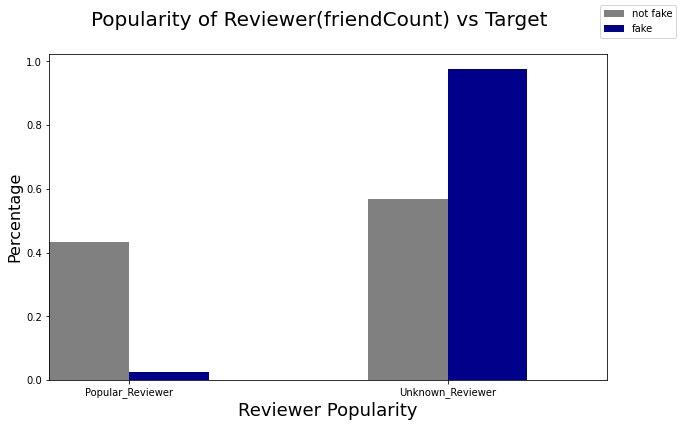

In [ ]:
# Sort the dataframe by target
target_0_df_train = df_train.loc[df_train['flagged'] == 0]
target_1_df_train = df_train.loc[df_train['flagged'] == 1]

width = .25

fig = plt.figure(figsize=(10,6))

fig.suptitle('Popularity of Reviewer(friendCount) vs Target', fontsize=20)
plt.xlabel('Reviewer Popularity', fontsize=18)
plt.ylabel('Percentage', fontsize=16)

target_0_df_train['friendCountLabel'].value_counts(normalize=True).sort_index().plot(kind='bar', color='grey', position=1, width = width) #sort index is necessary
target_1_df_train['friendCountLabel'].value_counts(normalize=True).sort_index().plot(kind='bar', color='darkblue', position=0, width = width)  #sort index is necessary

fig.legend(labels=['not fake','fake'])
plt.xticks(rotation = 0) # Rotates X-Axis Ticks by 45-degrees

plt.show()

In [ ]:
target_0_df_train.describe()

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
count,20752.000000,20752.000000,20752.0,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000,20752.000000
mean,3.973304,0.945692,0.0,61.221280,119.739640,10.876060,267.958944,186.506216,153.203691,166.056621,13.391095,7.378036,3.953812,87.553826
std,1.066061,2.063376,0.0,249.161154,231.890863,45.848618,1098.177143,899.968400,728.511122,1045.919368,67.647286,36.483842,0.227657,74.531120
min,1.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,1.000000
25%,3.000000,0.000000,0.0,2.000000,14.000000,0.000000,8.000000,2.000000,2.000000,1.000000,0.000000,0.000000,4.000000,37.000000
50%,4.000000,0.000000,0.0,11.000000,40.000000,1.000000,33.000000,12.000000,11.000000,4.000000,0.000000,1.000000,4.000000,67.000000
75%,5.000000,1.000000,0.0,39.000000,126.000000,6.000000,132.000000,60.000000,53.000000,28.000000,2.000000,3.000000,4.000000,115.000000
max,5.000000,49.000000,0.0,4706.000000,2611.000000,896.000000,21748.000000,19697.000000,17929.000000,39960.000000,2166.000000,640.000000,5.000000,612.000000


In [ ]:
target_1_df_train.describe()

,rating,reviewUsefulCount,flagged,friendCount,reviewCount,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength
count,6206.000000,6206.0,6206.0,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000,6206.000000
mean,3.812117,0.0,1.0,2.506445,7.197067,0.249597,3.270706,1.347406,1.150338,0.497261,0.298421,0.076378,3.931518,61.012730
std,1.404432,0.0,0.0,38.986490,12.670255,1.480487,10.587902,6.370497,5.412445,5.022294,4.303613,0.739776,0.222213,57.349791
min,1.000000,0.0,1.0,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.500000,1.000000
25%,3.000000,0.0,1.0,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,24.000000
50%,4.000000,0.0,1.0,0.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,44.000000
75%,5.000000,0.0,1.0,0.000000,8.000000,0.000000,3.000000,1.000000,1.000000,0.000000,0.000000,0.000000,4.000000,77.000000
max,5.000000,0.0,1.0,2798.000000,238.000000,37.000000,308.000000,208.000000,172.000000,304.000000,144.000000,42.000000,4.500000,549.000000


reviewUsefulCount


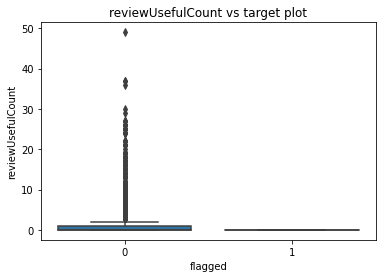

friendCount


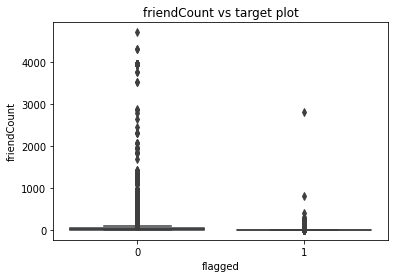

reviewCount


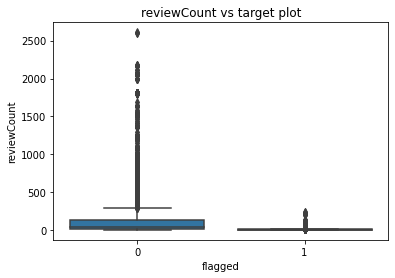

firstCount


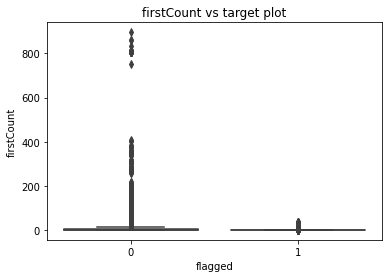

usefulCount


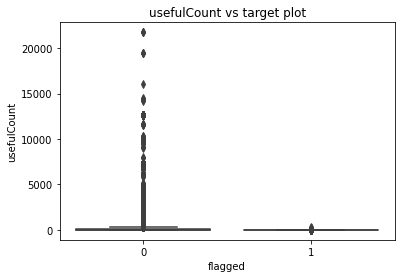

coolCount


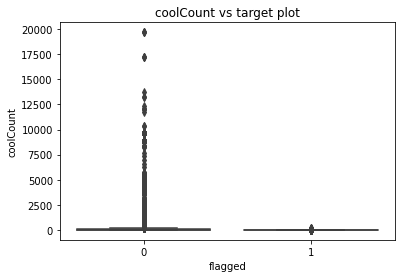

funnyCount


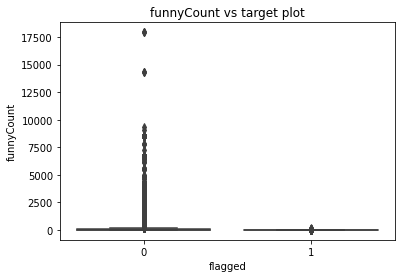

complimentCount


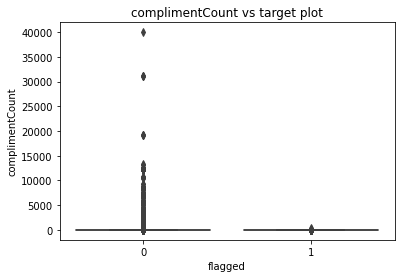

tipCount


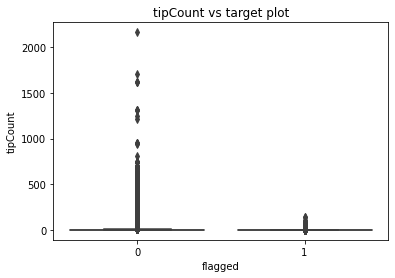

fanCount


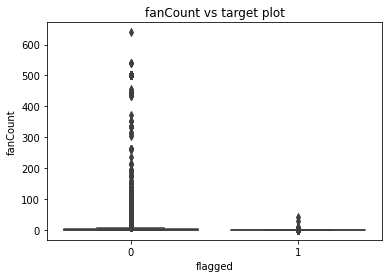

restaurantRating


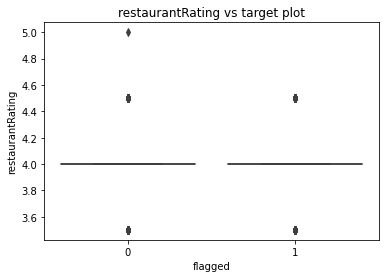

ReviewLength


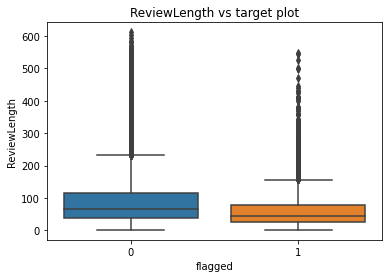

In [ ]:
#Plot of each feature with target

cols = ['reviewUsefulCount', 'friendCount',	'reviewCount',	'firstCount', 'usefulCount', 'coolCount', 'funnyCount', 'complimentCount',	'tipCount',	'fanCount', 'restaurantRating', 'ReviewLength']

for col in cols:
  print(col)
  sns.boxplot( x = df_train.flagged ,y = df_train[col])
  plt.title(col +' vs target plot')
  plt.show()   
  


In [ ]:
#Distribution of each feature

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWar

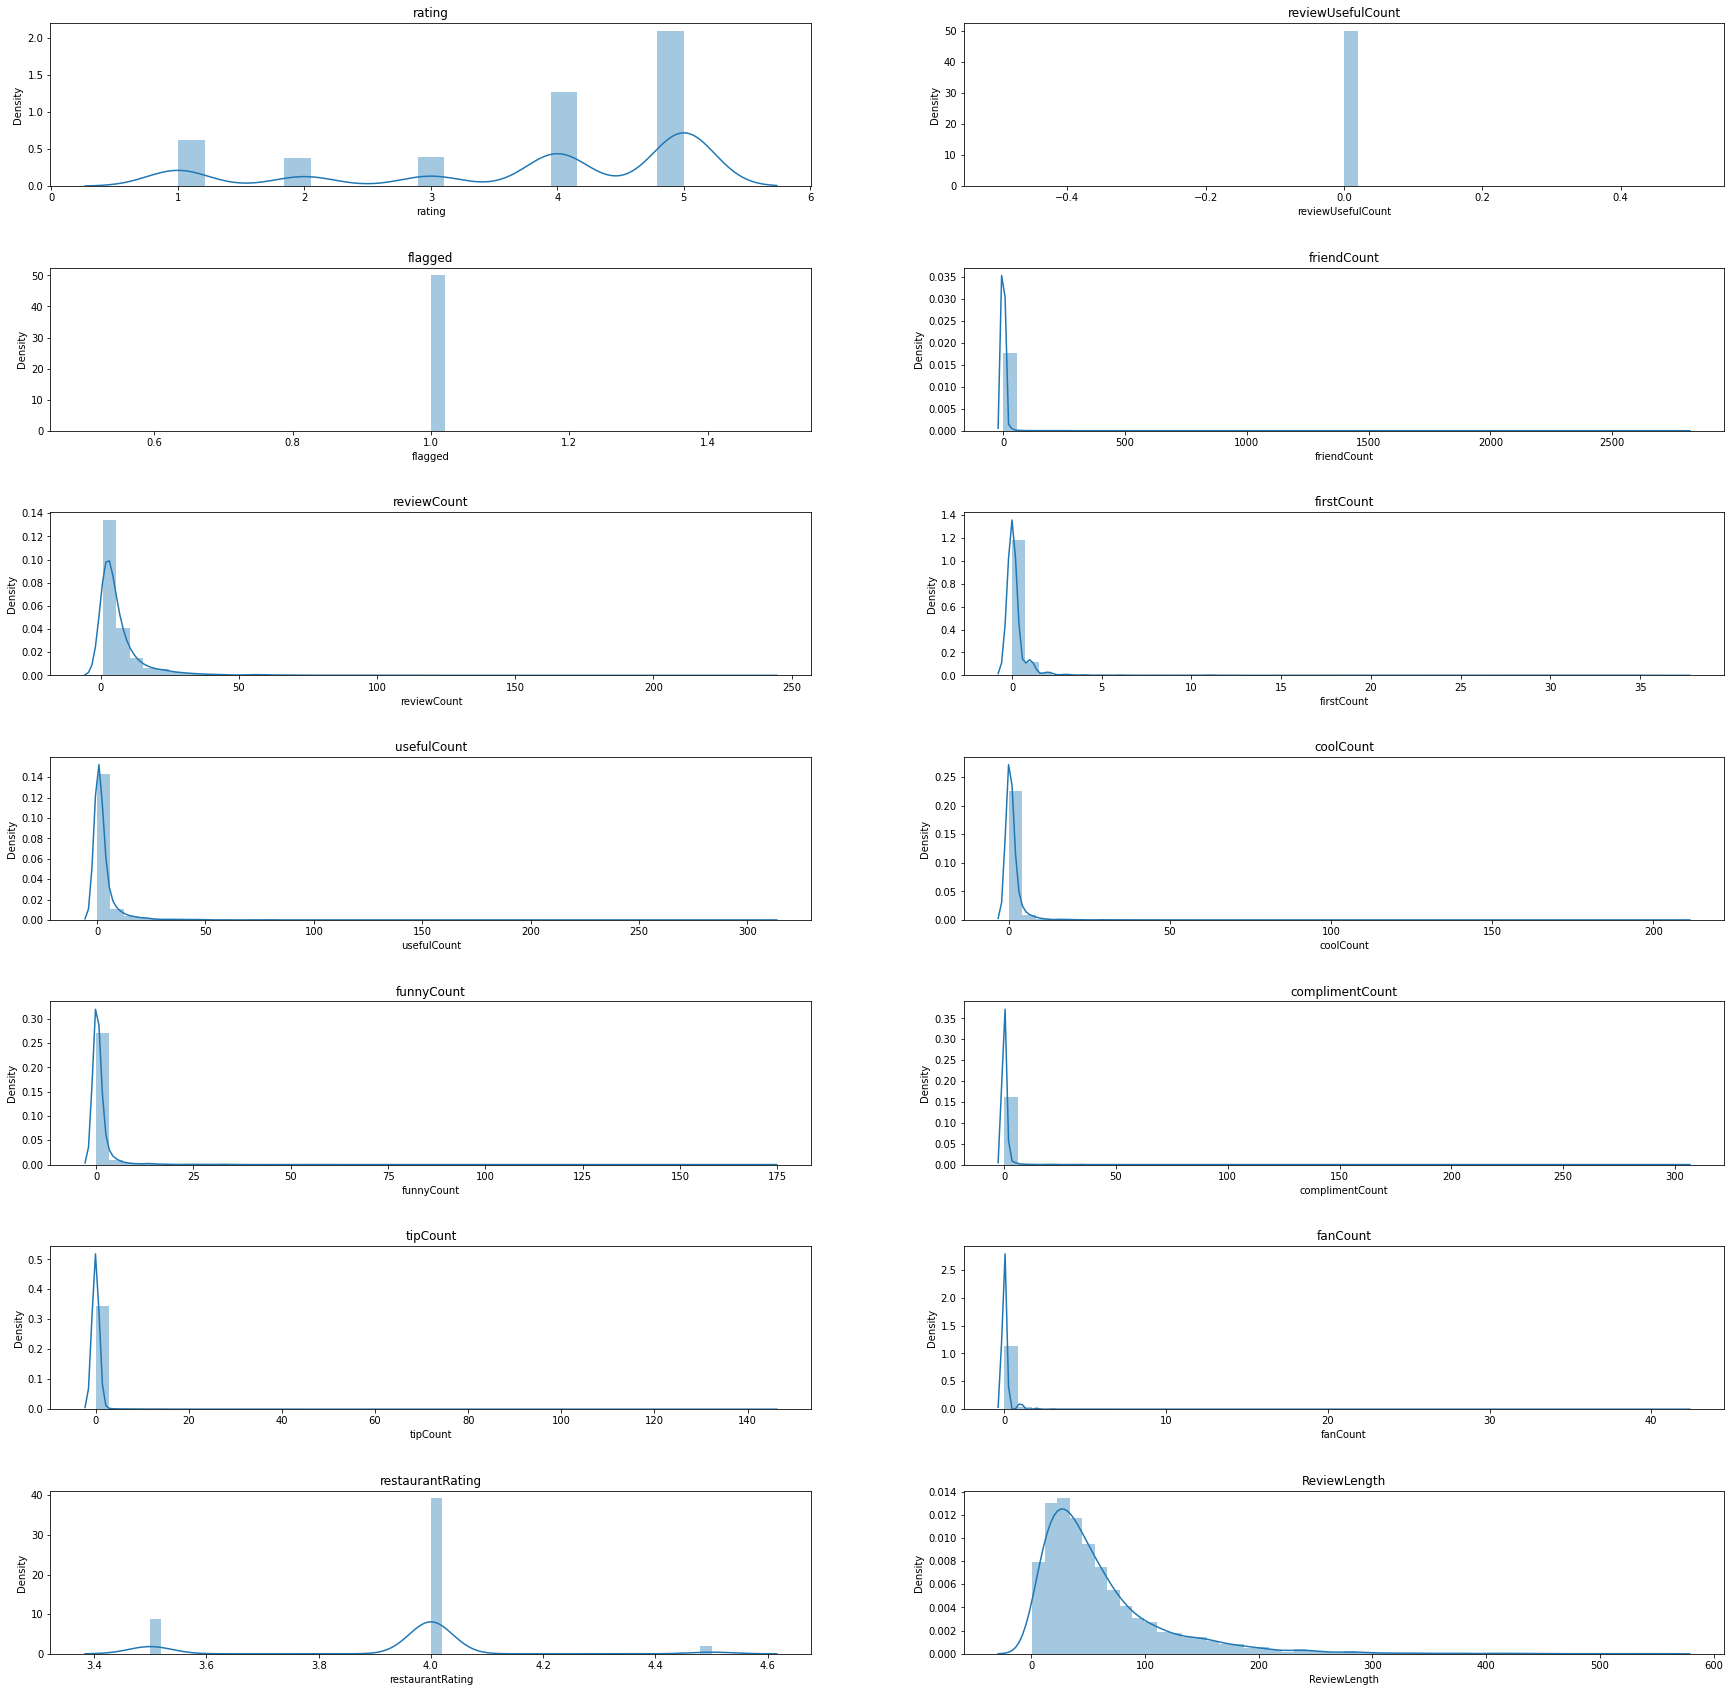

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2)
axes= axes.flatten()
fig.set_size_inches(30,30)
plt.subplots_adjust(hspace=0.5)


target_1_df_train_numeric = target_1_df_train._get_numeric_data()

for ax, col in zip(axes, target_1_df_train_numeric.columns):
  sns.distplot(target_1_df_train_numeric[col], ax=ax)
  ax.set_title(col)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

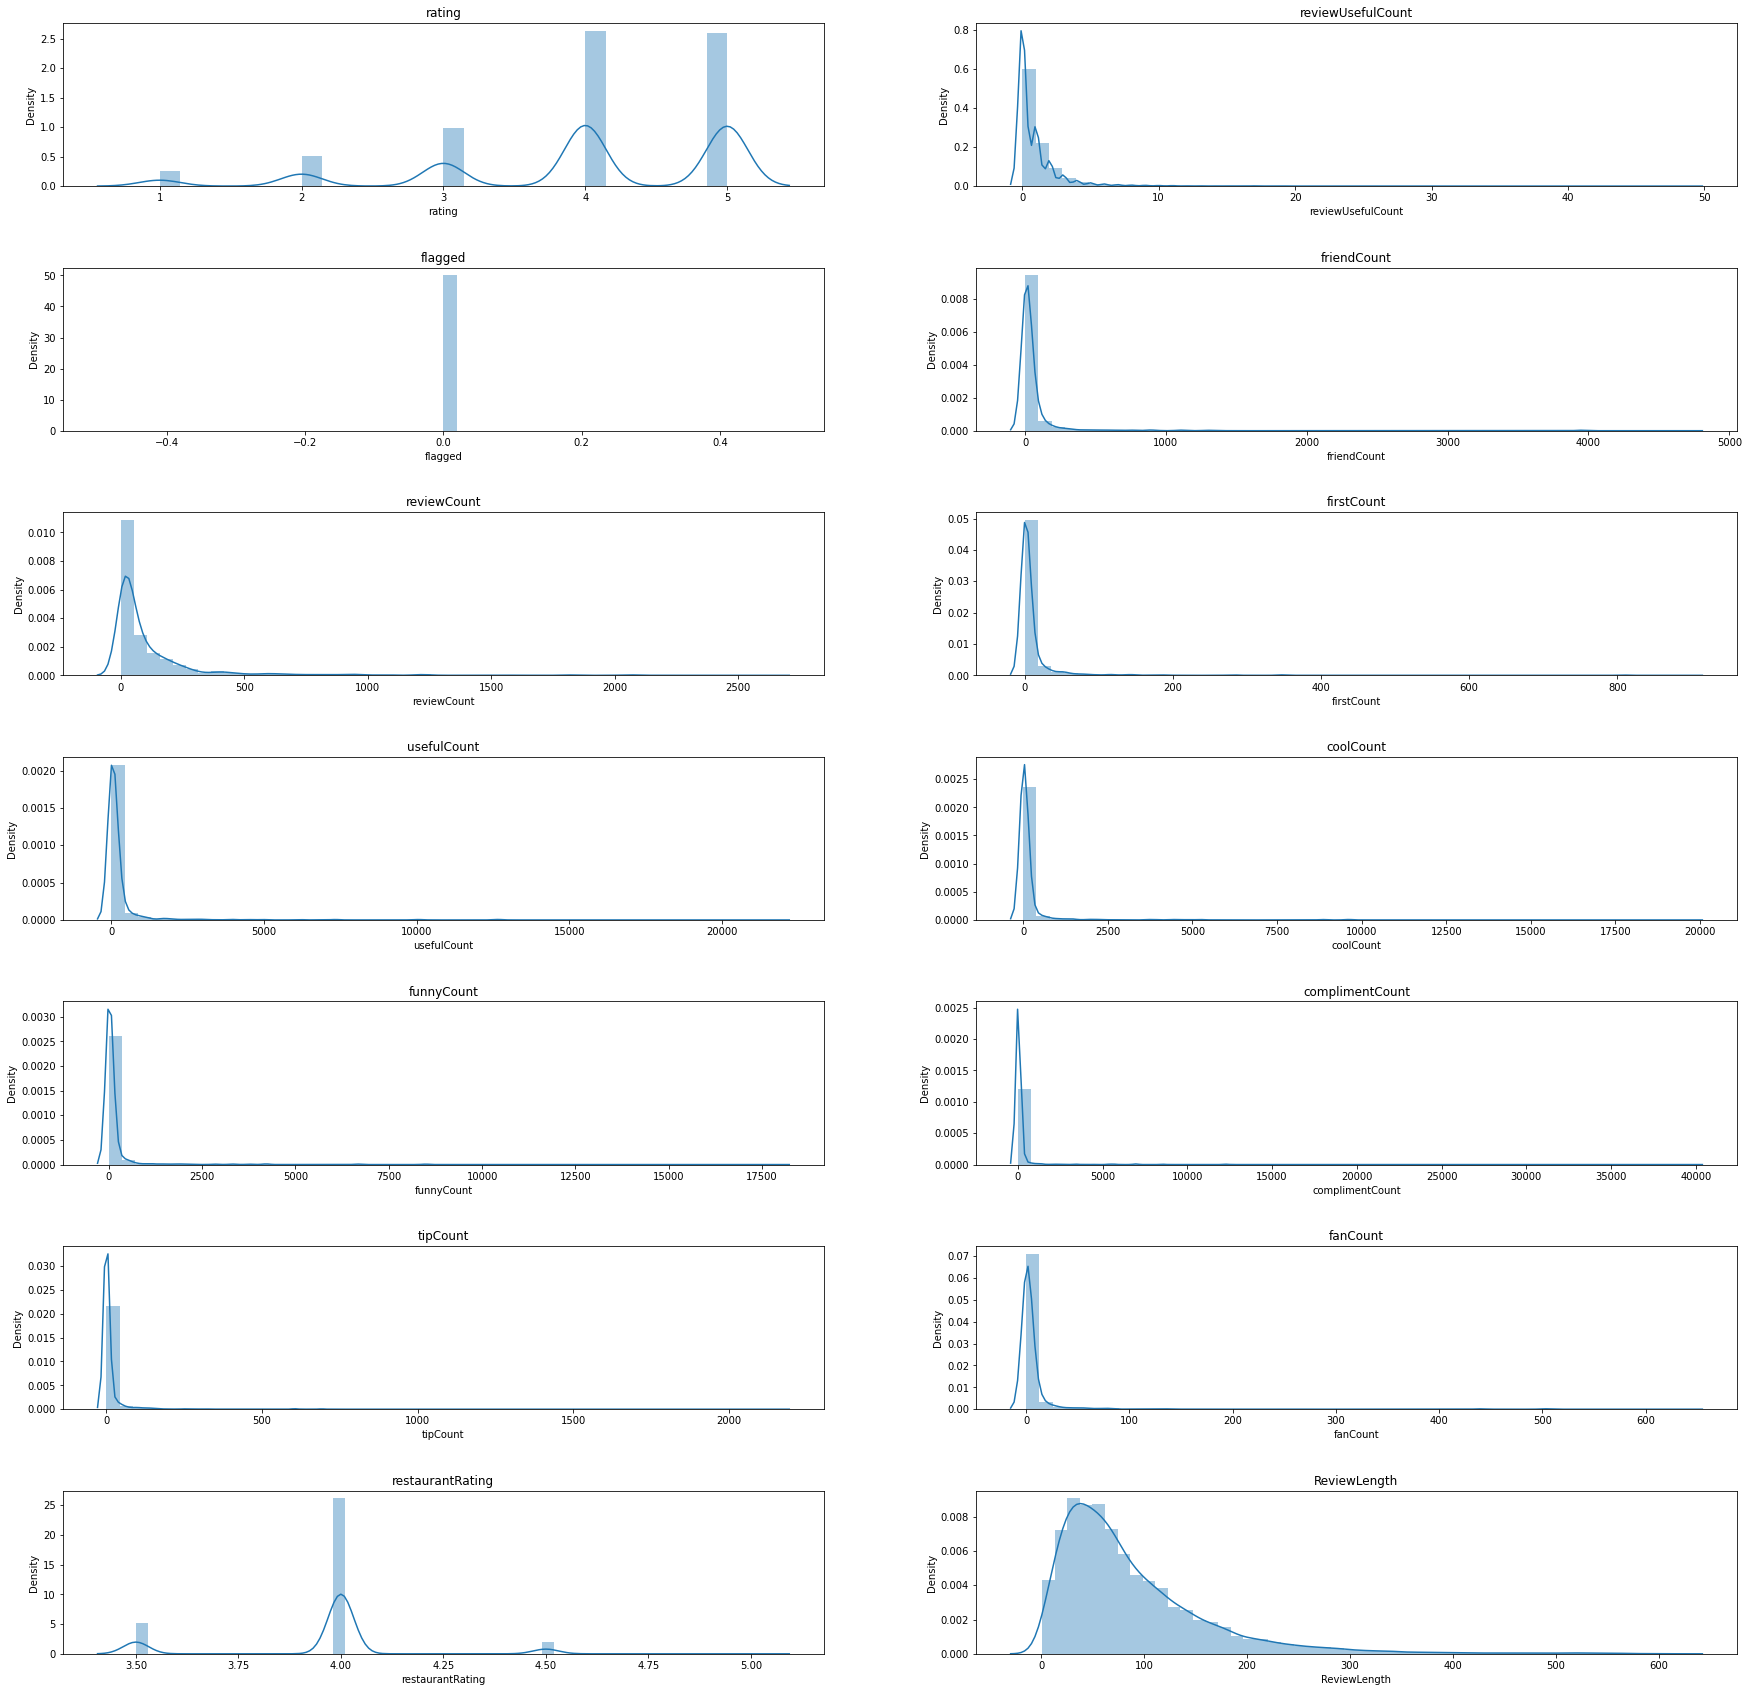

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2)
axes= axes.flatten()
fig.set_size_inches(30,30)
plt.subplots_adjust(hspace=0.5)


target_0_df_train_numeric = target_0_df_train._get_numeric_data()

for ax, col in zip(axes, target_0_df_train_numeric.columns):
  sns.distplot(target_0_df_train_numeric[col], ax=ax)
  ax.set_title(col)

In [ ]:
#To Do:
#Need to remove outliers and plot again

In [ ]:
target_0_df_train.shape, target_1_df_train.shape, df_train.shape

((20752, 23), (6206, 23), (26958, 23))

In [ ]:

def remove_outliers(df_train):

  cols = ['friendCount','reviewCount','firstCount','usefulCount', 'coolCount', 'funnyCount', 'complimentCount'	, 'tipCount',	'fanCount' ]

  Q1 = df_train[cols].quantile(0.25)
  print(Q1)
  Q3 = df_train[cols].quantile(0.75)
  print(Q3)
  IQR = Q3 - Q1
  print(IQR)

  df_train_no_outlier = df_train[~((df_train[cols] < (Q1 - 1.5 * IQR)) |(df_train[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]
  return df_train_no_outlier

In [ ]:
df_train_outlier_removed = remove_outliers(df_train)
df_train_outlier_removed.shape

friendCount        0.0
reviewCount        6.0
firstCount         0.0
usefulCount        2.0
coolCount          1.0
funnyCount         0.0
complimentCount    0.0
tipCount           0.0
fanCount           0.0
Name: 0.25, dtype: float64
friendCount        27.0
reviewCount        88.0
firstCount          3.0
usefulCount        85.0
coolCount          37.0
funnyCount         31.0
complimentCount    16.0
tipCount            1.0
fanCount            2.0
Name: 0.75, dtype: float64
friendCount        27.0
reviewCount        82.0
firstCount          3.0
usefulCount        83.0
coolCount          36.0
funnyCount         31.0
complimentCount    16.0
tipCount            1.0
fanCount            2.0
dtype: float64


(18111, 23)

In [ ]:
target_0_df_train_outlier_removed = remove_outliers(target_0_df_train)
target_0_df_train_outlier_removed.shape

friendCount         2.0
reviewCount        14.0
firstCount          0.0
usefulCount         8.0
coolCount           2.0
funnyCount          2.0
complimentCount     1.0
tipCount            0.0
fanCount            0.0
Name: 0.25, dtype: float64
friendCount         39.0
reviewCount        126.0
firstCount           6.0
usefulCount        132.0
coolCount           60.0
funnyCount          53.0
complimentCount     28.0
tipCount             2.0
fanCount             3.0
Name: 0.75, dtype: float64
friendCount         37.0
reviewCount        112.0
firstCount           6.0
usefulCount        124.0
coolCount           58.0
funnyCount          51.0
complimentCount     27.0
tipCount             2.0
fanCount             3.0
dtype: float64


(14028, 23)

In [ ]:
target_1_df_train_outlier_removed = remove_outliers(target_1_df_train)
target_1_df_train_outlier_removed.shape

friendCount        0.0
reviewCount        2.0
firstCount         0.0
usefulCount        0.0
coolCount          0.0
funnyCount         0.0
complimentCount    0.0
tipCount           0.0
fanCount           0.0
Name: 0.25, dtype: float64
friendCount        0.0
reviewCount        8.0
firstCount         0.0
usefulCount        3.0
coolCount          1.0
funnyCount         1.0
complimentCount    0.0
tipCount           0.0
fanCount           0.0
Name: 0.75, dtype: float64
friendCount        0.0
reviewCount        6.0
firstCount         0.0
usefulCount        3.0
coolCount          1.0
funnyCount         1.0
complimentCount    0.0
tipCount           0.0
fanCount           0.0
dtype: float64


(3587, 23)

In [ ]:
#Distribution of each feature after removing outliers

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWar

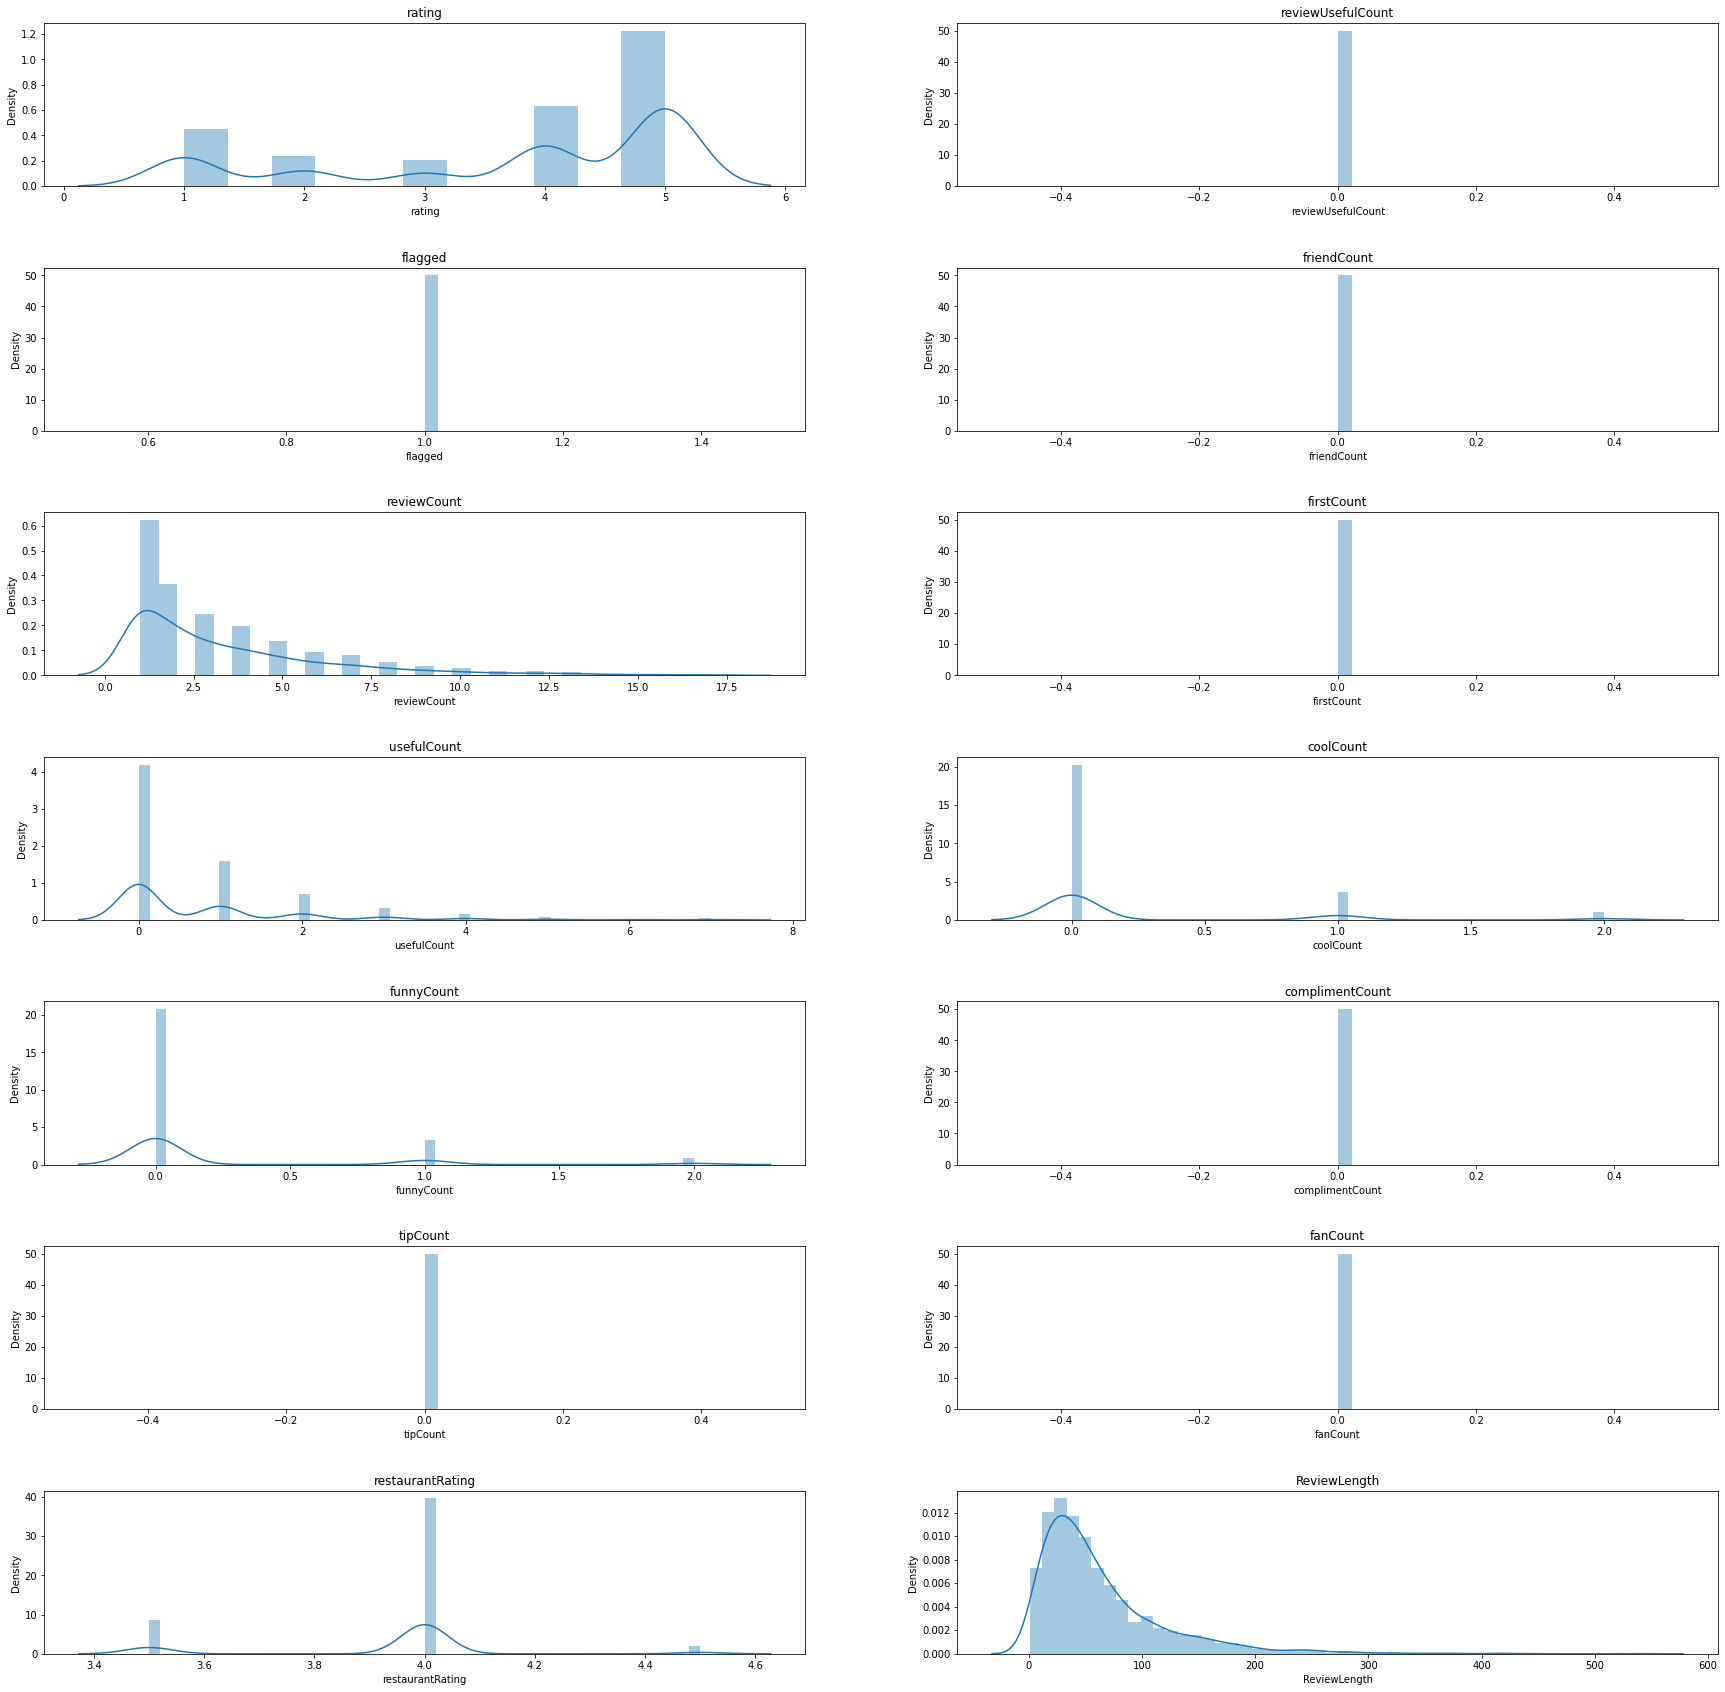

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2)
axes= axes.flatten()
fig.set_size_inches(30,30)
plt.subplots_adjust(hspace=0.5)


target_1_df_train_numeric = target_1_df_train_outlier_removed._get_numeric_data()

for ax, col in zip(axes, target_1_df_train_numeric.columns):
  sns.distplot(target_1_df_train_numeric[col], ax=ax)
  ax.set_title(col)

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

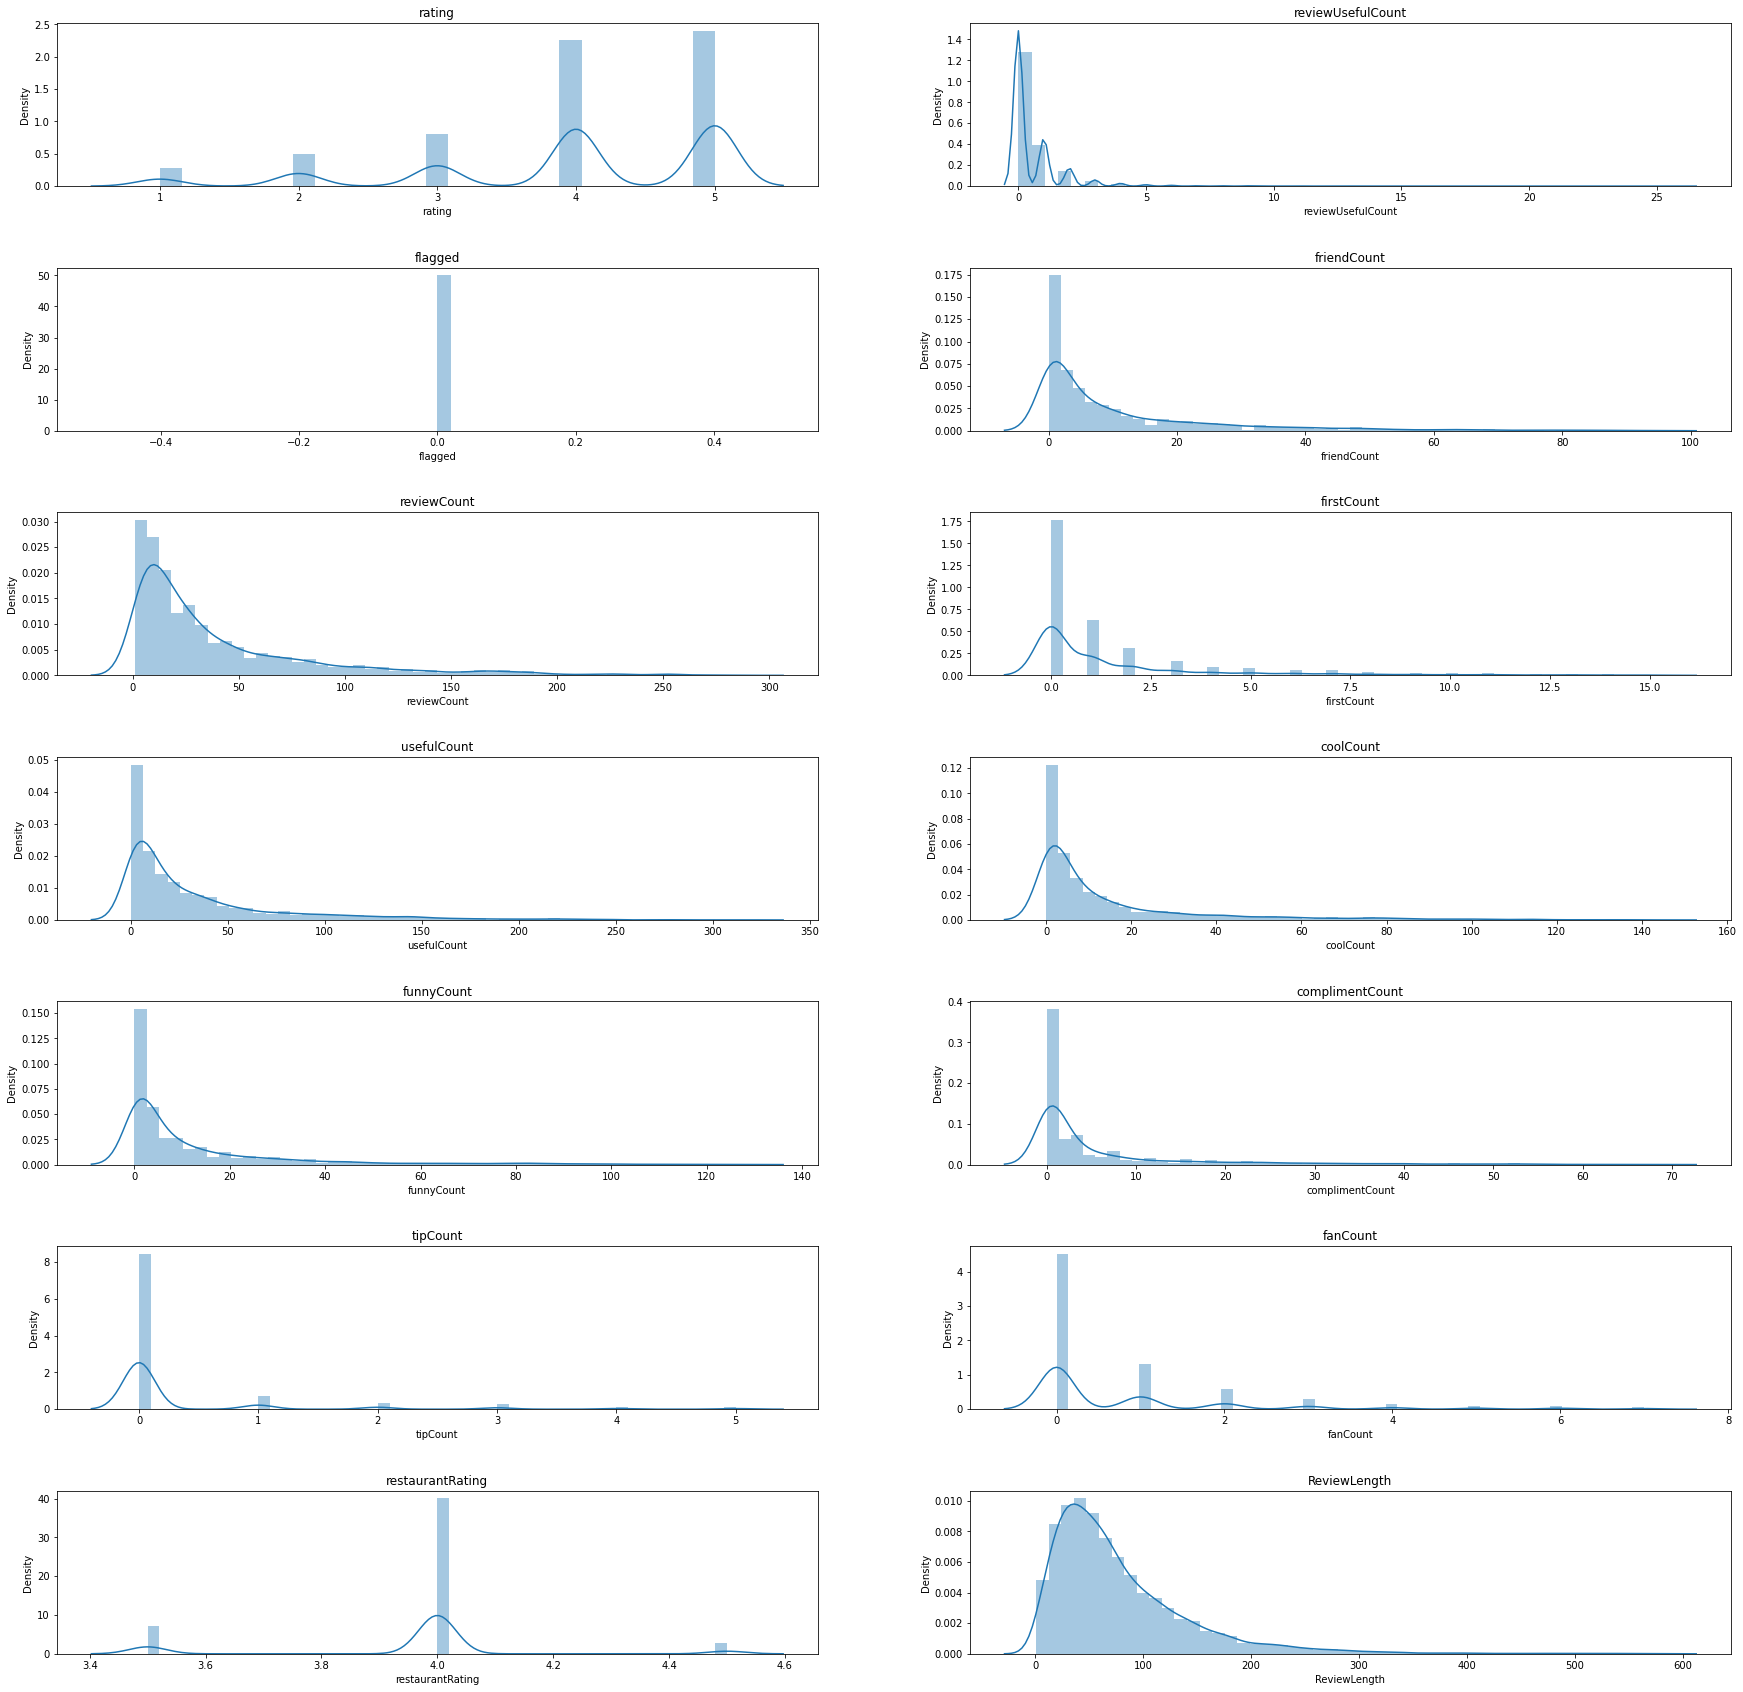

In [ ]:
fig, axes = plt.subplots(nrows=7, ncols=2)
axes= axes.flatten()
fig.set_size_inches(30,30)
plt.subplots_adjust(hspace=0.5)


target_0_df_train_numeric = target_0_df_train_outlier_removed._get_numeric_data()

for ax, col in zip(axes, target_0_df_train_numeric.columns):
  sns.distplot(target_0_df_train_numeric[col], ax=ax)
  ax.set_title(col)

reviewUsefulCount


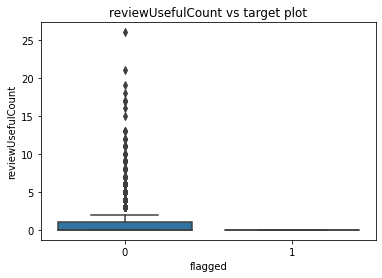

friendCount


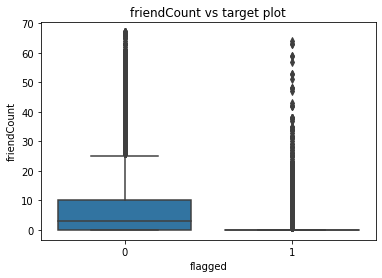

reviewCount


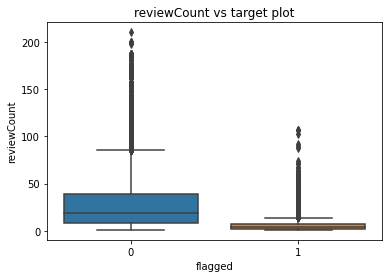

firstCount


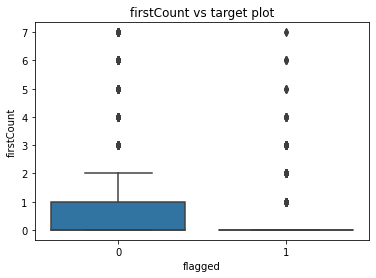

usefulCount


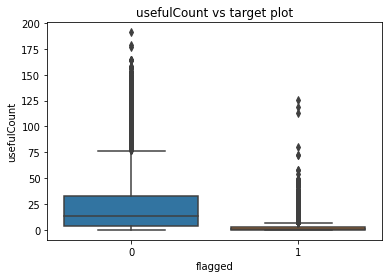

coolCount


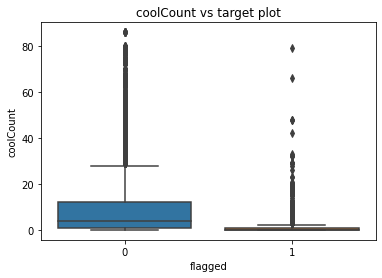

funnyCount


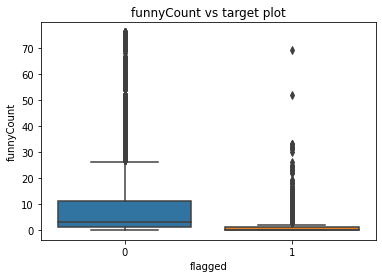

complimentCount


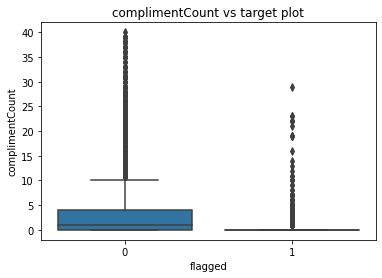

tipCount


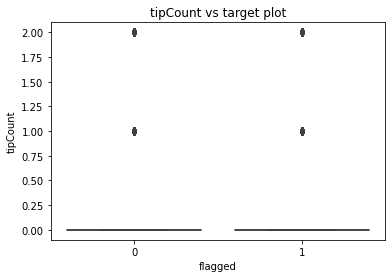

fanCount


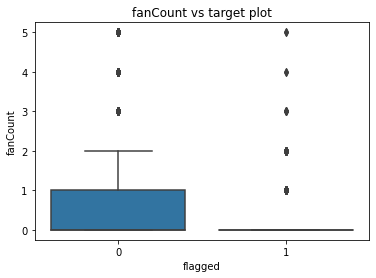

restaurantRating


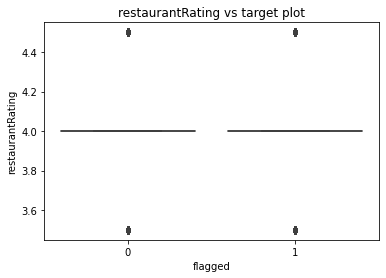

ReviewLength


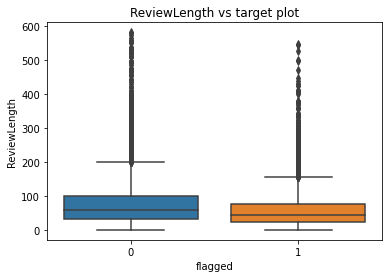

In [ ]:
#Plot of each feature with target

cols = ['reviewUsefulCount', 'friendCount',	'reviewCount',	'firstCount', 'usefulCount', 'coolCount', 'funnyCount', 'complimentCount',	'tipCount',	'fanCount', 'restaurantRating', 'ReviewLength']

for col in cols:
  print(col)
  sns.boxplot( x = df_train_outlier_removed.flagged ,y = df_train_outlier_removed[col])
  plt.title(col +' vs target plot')
  plt.show()   
  


In [ ]:
#Observations:

#We can see the difference in usefulCount among the features. This can be used for making a rule?

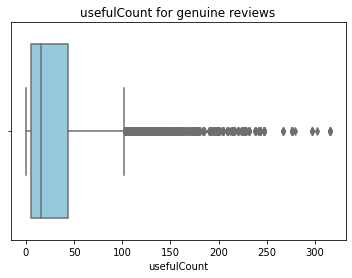

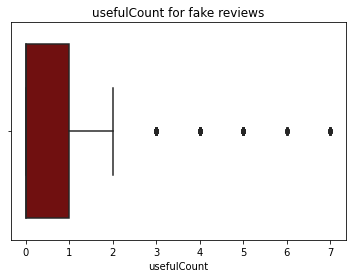

In [ ]:
col ='usefulCount'
sns.boxplot( x = target_0_df_train_outlier_removed[col], color='skyblue')
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_outlier_removed[col], color='maroon')
plt.title(col +' for fake reviews')
plt.show()   


In [ ]:
target_0_df_train_outlier_removed['usefulCount'].describe()

count    14028.000000
mean        34.402196
std         45.818042
min          0.000000
25%          5.000000
50%         16.000000
75%         44.000000
max        316.000000
Name: usefulCount, dtype: float64

In [ ]:
target_1_df_train_outlier_removed['usefulCount'].describe()

count    3587.000000
mean        0.781991
std         1.251827
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         7.000000
Name: usefulCount, dtype: float64

In [ ]:
#Let's see ReviewLength again

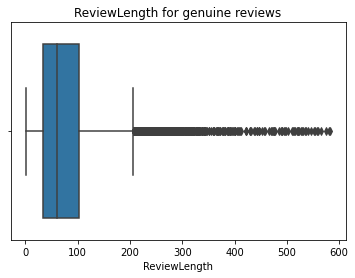

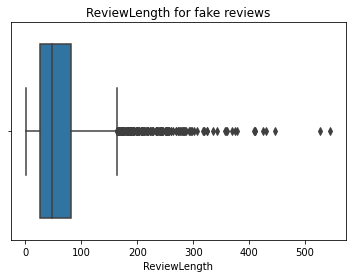

In [ ]:
col ='ReviewLength'
sns.boxplot( x = target_0_df_train_outlier_removed[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_outlier_removed[col]) 
plt.title(col +' for fake reviews')
plt.show()   


In [ ]:
#Let's see funnyCount again

In [ ]:
col ='funnyCount'
sns.boxplot( x = target_0_df_train_no_outlier[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_no_outlier[col]) 
plt.title(col +' for fake reviews')
plt.show()   


In [ ]:
col ='coolCount'
sns.boxplot( x = target_0_df_train_no_outlier[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_no_outlier[col]) 
plt.title(col +' for fake reviews')
plt.show()   


In [ ]:
col ='friendCount'
sns.boxplot( x = target_0_df_train_no_outlier[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_no_outlier[col]) 
plt.title(col +' for fake reviews')
plt.show()   


In [ ]:
col ='fanCount'
sns.boxplot( x = target_0_df_train_no_outlier[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_no_outlier[col]) 
plt.title(col +' for fake reviews')
plt.show()   


In [ ]:
col ='reviewUsefulCount'
sns.boxplot( x = target_0_df_train_no_outlier[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_no_outlier[col]) 
plt.title(col +' for fake reviews')
plt.show()   

In [ ]:
col ='reviewCount'
sns.boxplot( x = target_0_df_train_no_outlier[col])
plt.title(col +' for genuine reviews')
plt.show()   

sns.boxplot( x = target_1_df_train_no_outlier[col]) 
plt.title(col +' for fake reviews')
plt.show()   

In [ ]:
df_train_outlier_removed.drop(['firstCount', 'tipCount', 'fanCount','restaurantRating'], axis=1, inplace=True)
target_0_df_train_outlier_removed.drop(['firstCount', 'tipCount', 'fanCount','restaurantRating'], axis=1, inplace=True)
target_1_df_train_outlier_removed.drop(['firstCount', 'tipCount', 'fanCount','restaurantRating'], axis=1, inplace=True)

In [ ]:
# performing sentiment analysis on the review_content
from textblob import TextBlob

review_text = df_train['reviewContent'].tolist()
#print(reviews)
sentiment_score = []
review_head_sentiment=[]
for review in review_text:
    testimonial = TextBlob(review)
    sentiment_score.append(testimonial.sentiment.polarity)

df_train['sentiment_score'] = sentiment_score

In [ ]:
df_train.head()

,reviewID,reviewerID,restaurantID,date,rating,reviewUsefulCount,reviewContent,flagged,name,location,...,firstCount,usefulCount,coolCount,funnyCount,complimentCount,tipCount,fanCount,restaurantRating,ReviewLength,sentiment_score
0,GtwU21YOQn-wf4vWRUIx6w,bNYesZ944s6IJVowOnB0iA,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,unlike next we d eaten previous night dish com...,0,Scott E.,"Glengary, WV",...,5,41,5,5,2,0,1,4.5,497,0.140779
1,0LpVTc3,TRKxLC3y-ZvP45e5iilMtw,pbEiXam9YJL3neCYHGwLUA,9/22/2012,5,0,probably one best meals i ve ever it s perform...,0,Jerry K.,"Palos Verdes Peninsula, CA",...,0,0,0,0,0,0,0,4.5,41,0.471429
2,tljtLzf68Fkwf,0EMm8umAqXZzyhxNpL4M9g,pbEiXam9YJL3neCYHGwLUA,9/19/2012,3,2,service impeccable experience presentation coo...,0,Patricia M.,"Chicago, IL",...,0,6,0,1,0,0,0,4.5,27,0.413333
3,iSN,DlwexC7z88ymAzu45skODw,pbEiXam9YJL3neCYHGwLUA,9/6/2012,3,8,the problem places like this given exhorbitant...,0,Terry N.,"San Jose, CA",...,1,35,8,6,6,11,0,4.5,244,0.120548
4,Jmwrh7,kW2dk1CWihmh3g7k9N2G8A,pbEiXam9YJL3neCYHGwLUA,9/9/2012,5,1,i idea write review dining alinea brings whole...,0,Shradha Vegetarianista A.,"Chicago, IL",...,61,1650,679,417,283,22,70,4.5,97,0.167460


- positive sentiment and negative sentiment falls within the range --> FR
- need to decide the range values

In [ ]:
# print all the values that lie above certain threshold
flagged_val = df_train['flagged'].tolist()
low_range = 0.8
high_range = 1.0
flag = 1 # fake -> 1
sentiment_count = 0
fake_count = 0
for i, score in enumerate(sentiment_score):

  if score >=low_range and score <= high_range:
    sentiment_count = sentiment_count+1
    if flagged_val[i] == 1:
      fake_count = fake_count+1
    
print(sentiment_count)
print(fake_count)



378
152


25173 1785


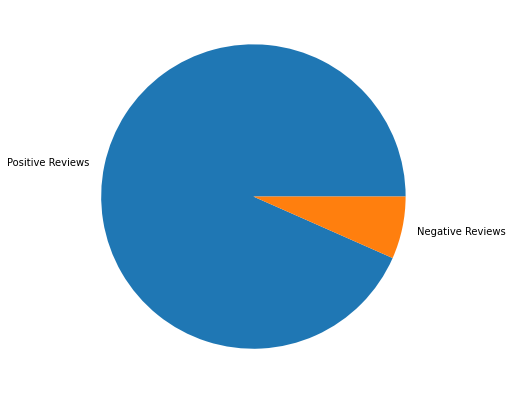

In [ ]:
pos, neg = 0,0
for score in sentiment_score:
  if score>0:
    pos = pos+1
  else:
    neg = neg+1

print(pos, neg)
values = [pos, neg]
label = ['Positive Reviews', 'Negative Reviews']

fig = plt.figure(figsize =(10, 7)) 
plt.pie(values, labels = label)

plt.show()
# this results indicatre that there are more postive sentiment running across these fake review text. A
# at the same time it is worthy to note that even the negative sentiment is quite huge (although not very comparable to positive sentiment). 

In [ ]:

# check how many of negative reviews are fake reviews:
count = 0
for index, row in df_train.iterrows():
  score = row['sentiment_score']
  if score ==0 and row['flagged'] == 1:
    count = count+1
print(count)




222


In [ ]:
535/1785 # from the total number of negative reviews: how many were negative and fake

0.29971988795518206

In [ ]:
5596/25173 # from total postitive reviews fake: how many were positive and fake

0.2223016724268065

In [ ]:
len(df_train[df_train['flagged']==1]) # total number of fake reviews 

6206

In [ ]:
5596/6206 # from total fake reviews: how many were positive and fake

0.9017080244924267

In [ ]:
535/6206 # from total fake reviews: how many were negative and fake

0.08620689655172414

In [ ]:
5596+535+75

6206

In [ ]:
x = [0, 1]
y = [0, 0.5, -0.5]


In [ ]:
def find_sentiment(text):
  testimonial = TextBlob(review)
  return testimonial.sentiment